## IA376I – Tópicos em Engenharia de Computação VII
### Tópico: Análise de Dados Visual (Visual Analytics)
**Professora:** Wu, Shin - Ting<br>
**Aluno:** Luiz Roberto Albano Junior **RA:** 272746<br>

---


### Exercício 1

Existem vários sites e recursos online que apresentam exemplos de designs de interface gráfica considerados ruins. Alguns deles são:

- Interface do usuário para aplicativos móveis ou web: https://synodus.com/blog/web-development/bad-ui-design/
- Coleção de erros comuns de design de interface: http://hallofshame.gp.co.at/shame.htm 
- Exemplos de design de interface inadequado de forma geral: https://www.interaction-desiorg/literature/article/bad-ui-design-examples

Esses recursos podem ser úteis para projetistas de interface de usuário e desenvolvedores, pois oferecem insights sobre o que não fazer em seus próprios projetos e inspiração para evitar erros comuns de design. Relacione cada um dos erros mencionados nos três sites citados aos princípios discutidos ao longo do capítulo que foram violados.

**Resposta:**<br><br>

---

### Exercício 2: 
Reescreva em Python, usando a grámtica dos grafos implementada no pacote plotnine, os códigos em R no:

#### Item 1: exemplo da Seção 8.1 na referência [34]

Importação das bibliotecas necessárias e conjunto de dados para resolução do Item 1

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

murders = pd.read_csv("murders.csv")

Pré-visualização do DataFrame

In [2]:
murders.head()

state abb region  population  total
0     Alabama  AL  South     4779736    135
1      Alaska  AK   West      710231     19
2     Arizona  AZ   West     6392017    232
3    Arkansas  AR  South     2915918     93
4  California  CA   West    37253956   1257

In [3]:
#Objeto que representa o gráfico da resolução do Item 1
graph1 = ggplot(data=murders, mapping=aes(x=murders['population']/10**6, y='total', label="abb"))

Mapeamento estético

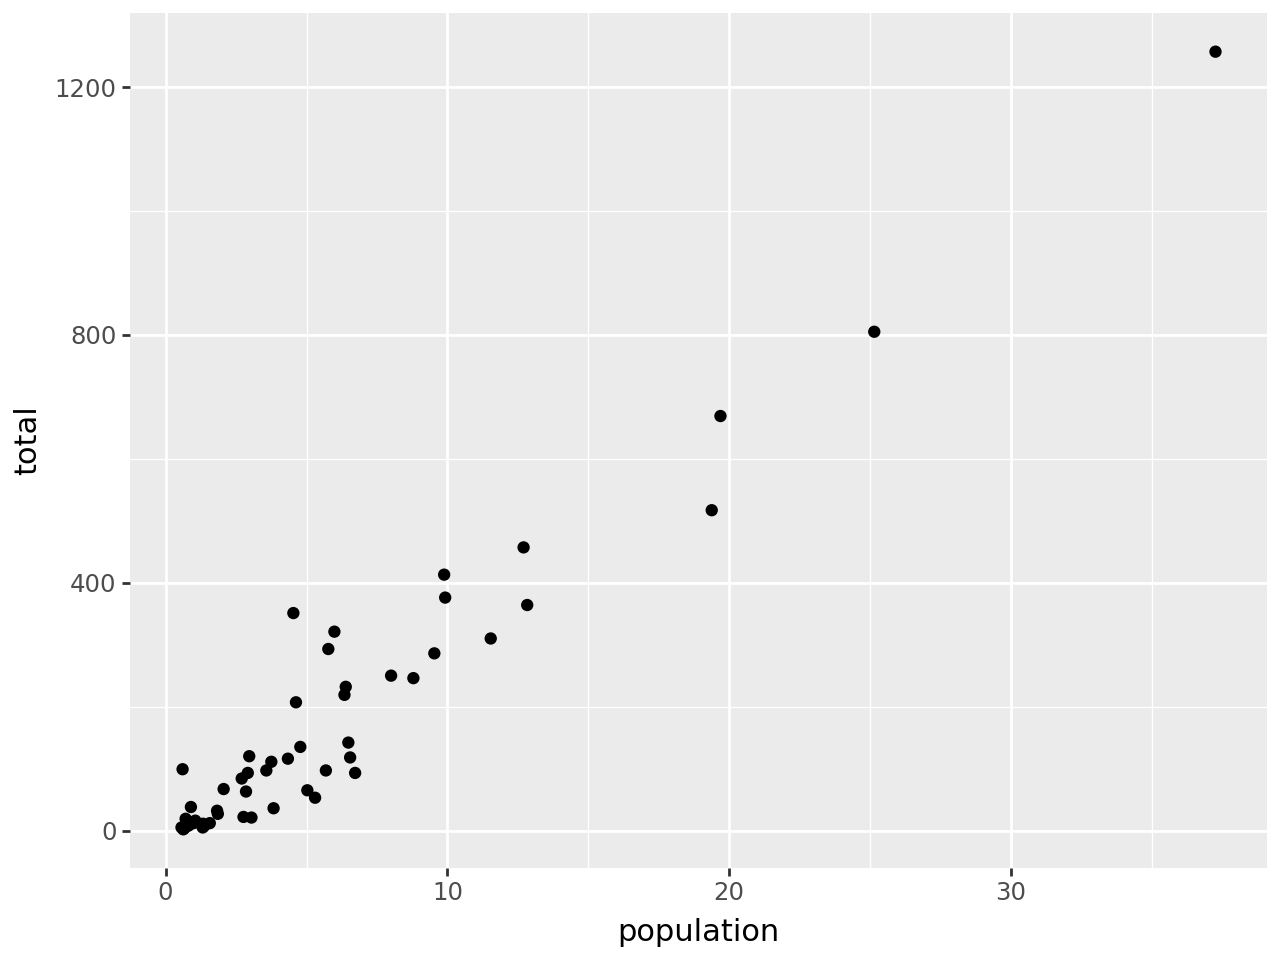

In [4]:
(
    graph1 + 
    geom_point()
)

Adicionando os rótulos a cada ponto e ajustes nos aspectos de exibição do gráfico de dispersão

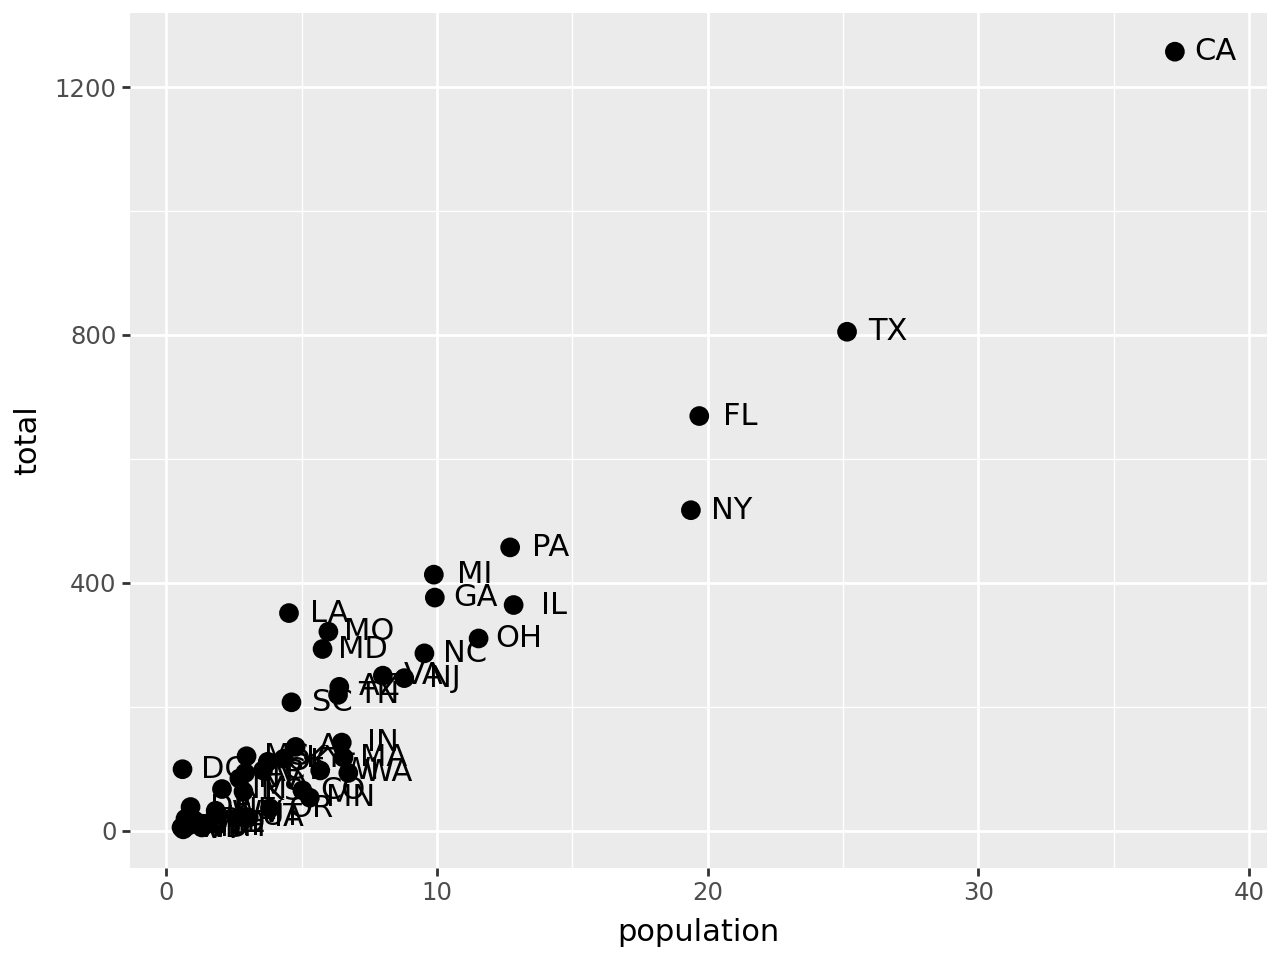

In [5]:
(
    graph1 + 
    geom_point(size=3) +
    geom_text(nudge_x=1.5)
)

Ajuste nas escalas

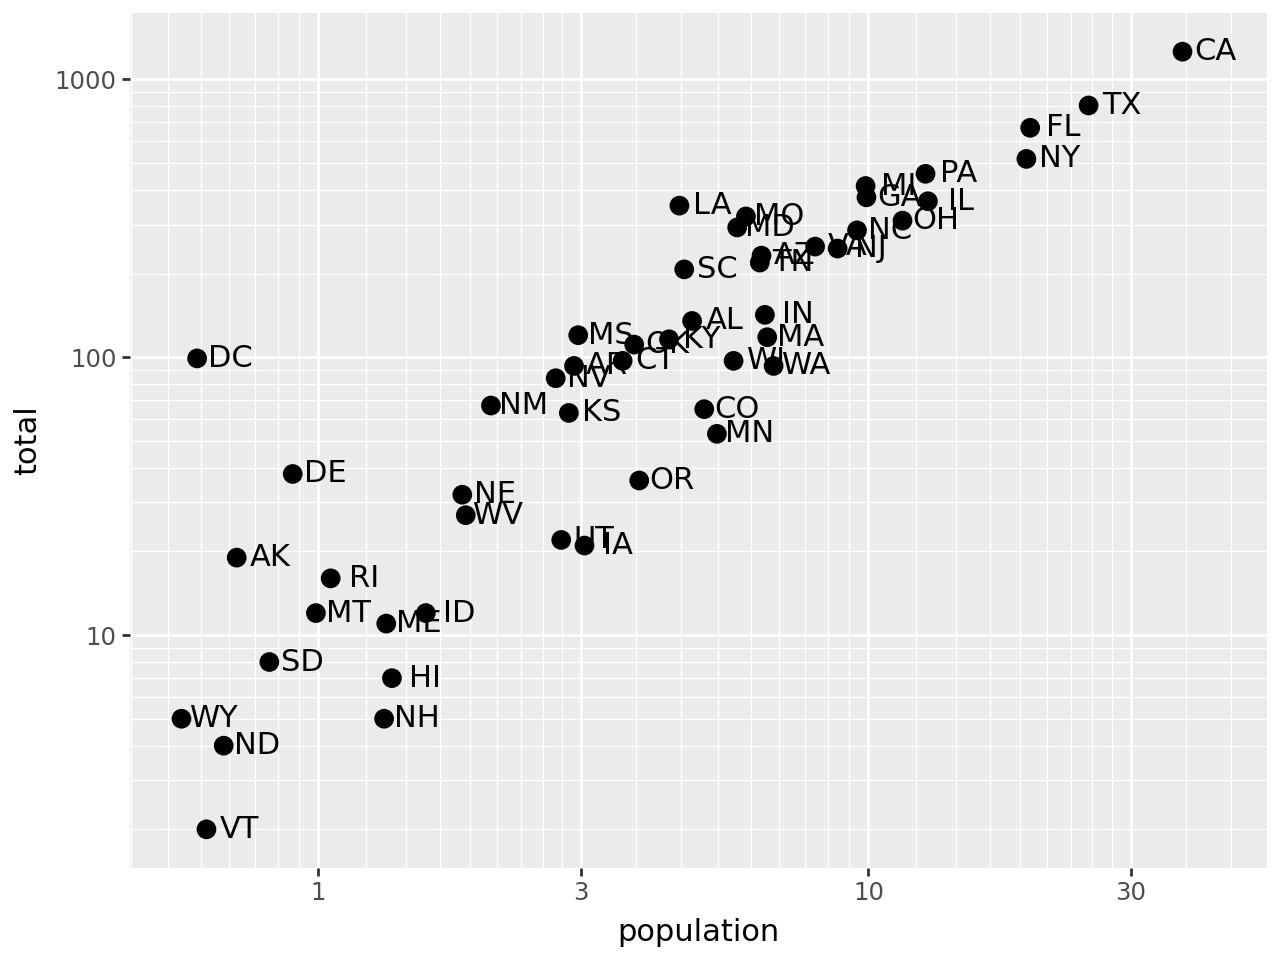

In [6]:
(
    graph1 + 
    geom_point(size=3) +
    geom_text(nudge_x=0.06) + 
    scale_x_log10() + scale_y_log10()
)

Adicionando rótulos e títulos

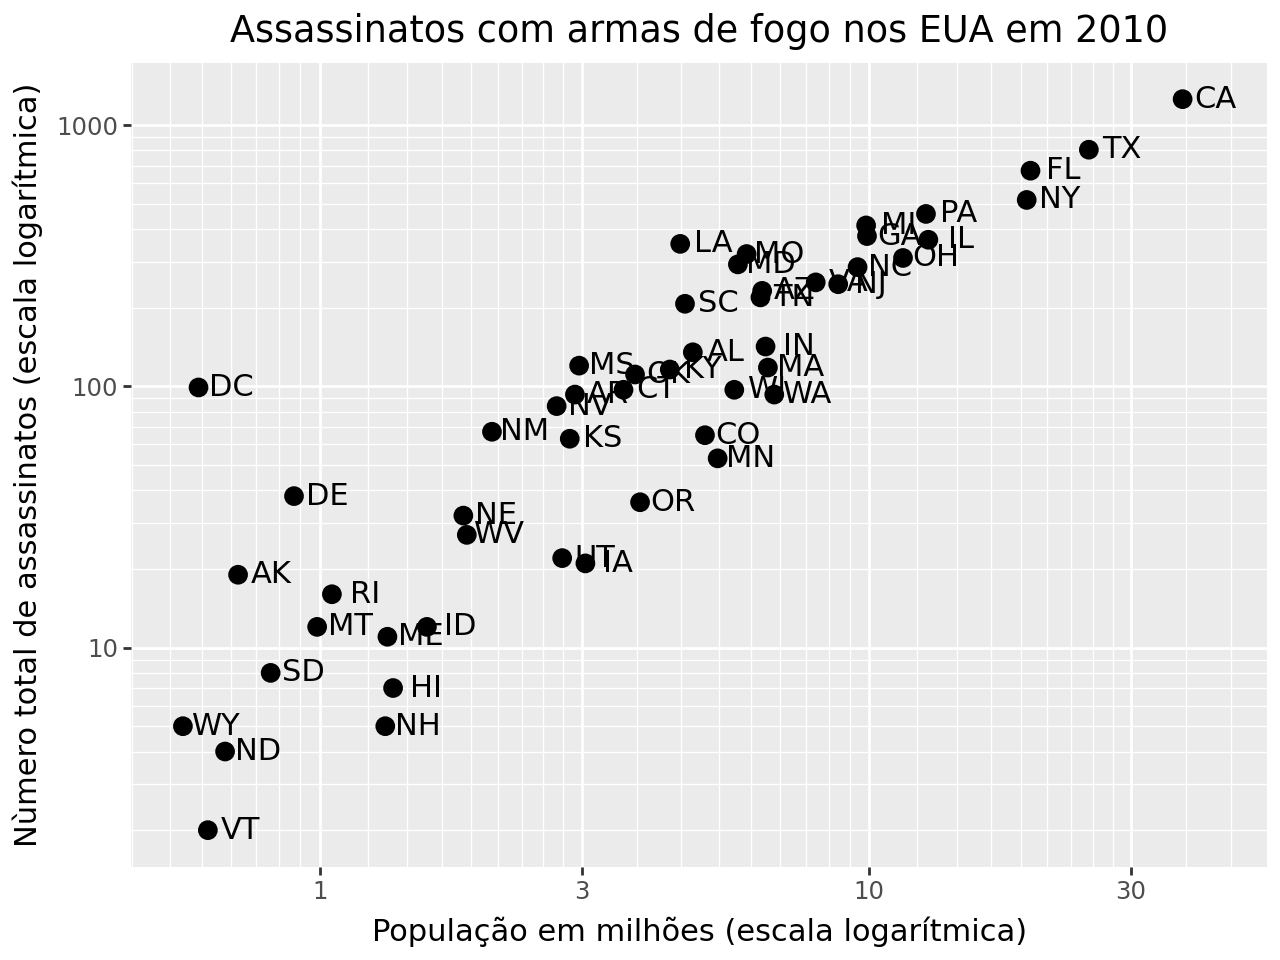

In [7]:
(
    graph1 + 
    geom_point(size=3) +
    geom_text(nudge_x=0.06) + 
    scale_x_log10() + scale_y_log10() + 
    xlab("População em milhões (escala logarítmica)") + 
    ylab("Nùmero total de assassinatos (escala logarítmica)") + 
    ggtitle("Assassinatos com armas de fogo nos EUA em 2010")
)

Personalizando as cores dos pontos, conforme a localização geográfica

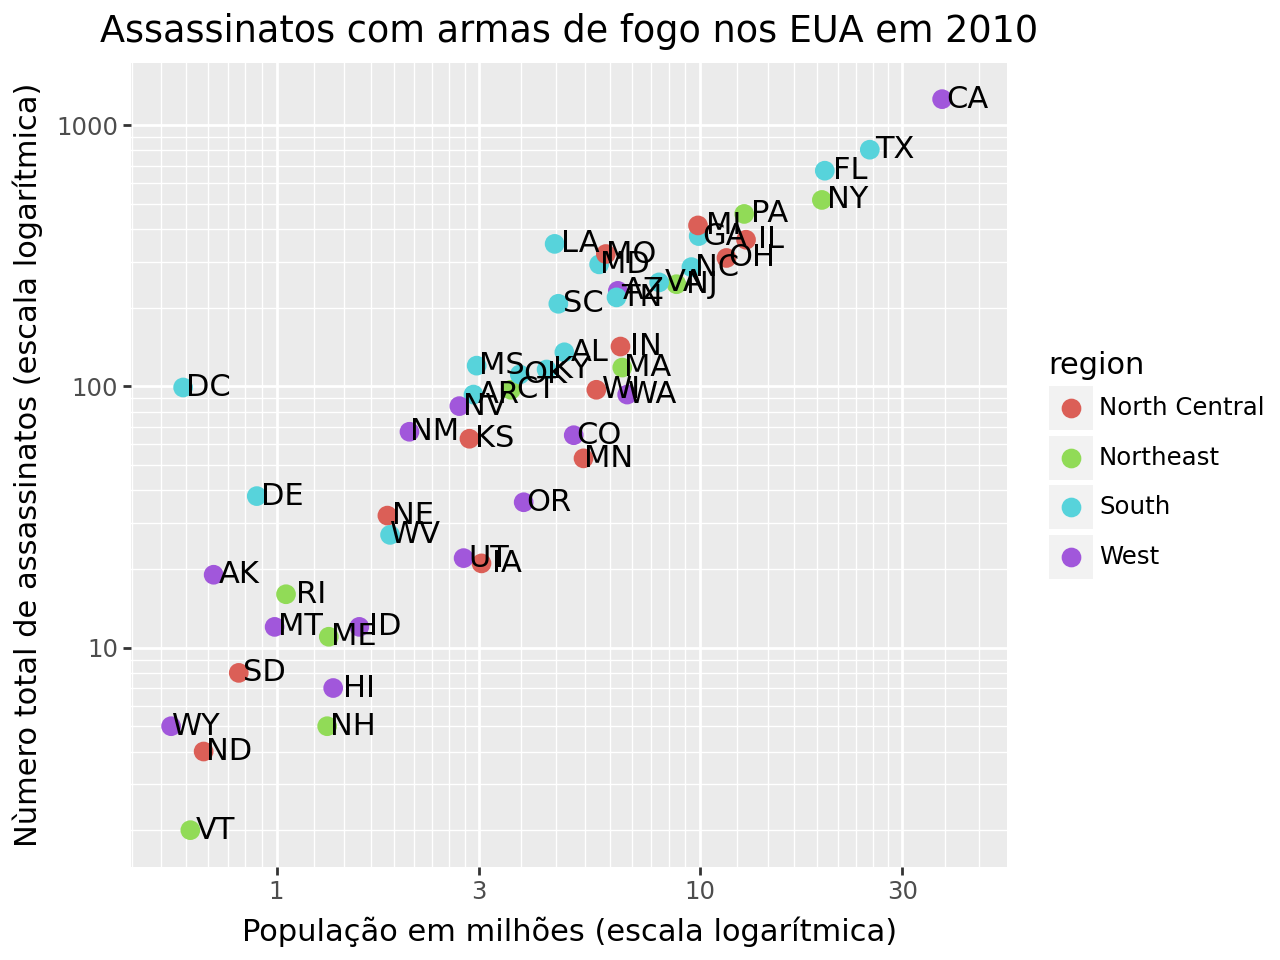

In [8]:
(
    graph1 + 
    geom_point(aes(color='region'), size=3) +
    geom_text(nudge_x=0.06) + 
    scale_x_log10() + scale_y_log10() + 
    xlab("População em milhões (escala logarítmica)") + 
    ylab("Nùmero total de assassinatos (escala logarítmica)") + 
    ggtitle("Assassinatos com armas de fogo nos EUA em 2010")
)

Calculando e adicionando uma linha para representar a taxa média de assassinatos.

In [9]:
murders['rate'] = (murders['total'].sum() / murders['population'].sum()) * 10 ** 6
murders['rate']

0     30.345549
1     30.345549
2     30.345549
3     30.345549
4     30.345549
5     30.345549
6     30.345549
7     30.345549
8     30.345549
9     30.345549
10    30.345549
11    30.345549
12    30.345549
13    30.345549
14    30.345549
15    30.345549
16    30.345549
17    30.345549
18    30.345549
19    30.345549
20    30.345549
21    30.345549
22    30.345549
23    30.345549
24    30.345549
25    30.345549
26    30.345549
27    30.345549
28    30.345549
29    30.345549
30    30.345549
31    30.345549
32    30.345549
33    30.345549
34    30.345549
35    30.345549
36    30.345549
37    30.345549
38    30.345549
39    30.345549
40    30.345549
41    30.345549
42    30.345549
43    30.345549
44    30.345549
45    30.345549
46    30.345549
47    30.345549
48    30.345549
49    30.345549
50    30.345549
Name: rate, dtype: float64

**Observação:** no exemplo em R, foi utilizada na função geom_abline() o parâmetro **lty** para alterar o tipo de linha. Consultando a documentação da biblioteca Plotnine (https://plotnine.org/reference/geom_abline.html#plotnine.geom_abline), o parâmetro é nomeado como **linetype**.

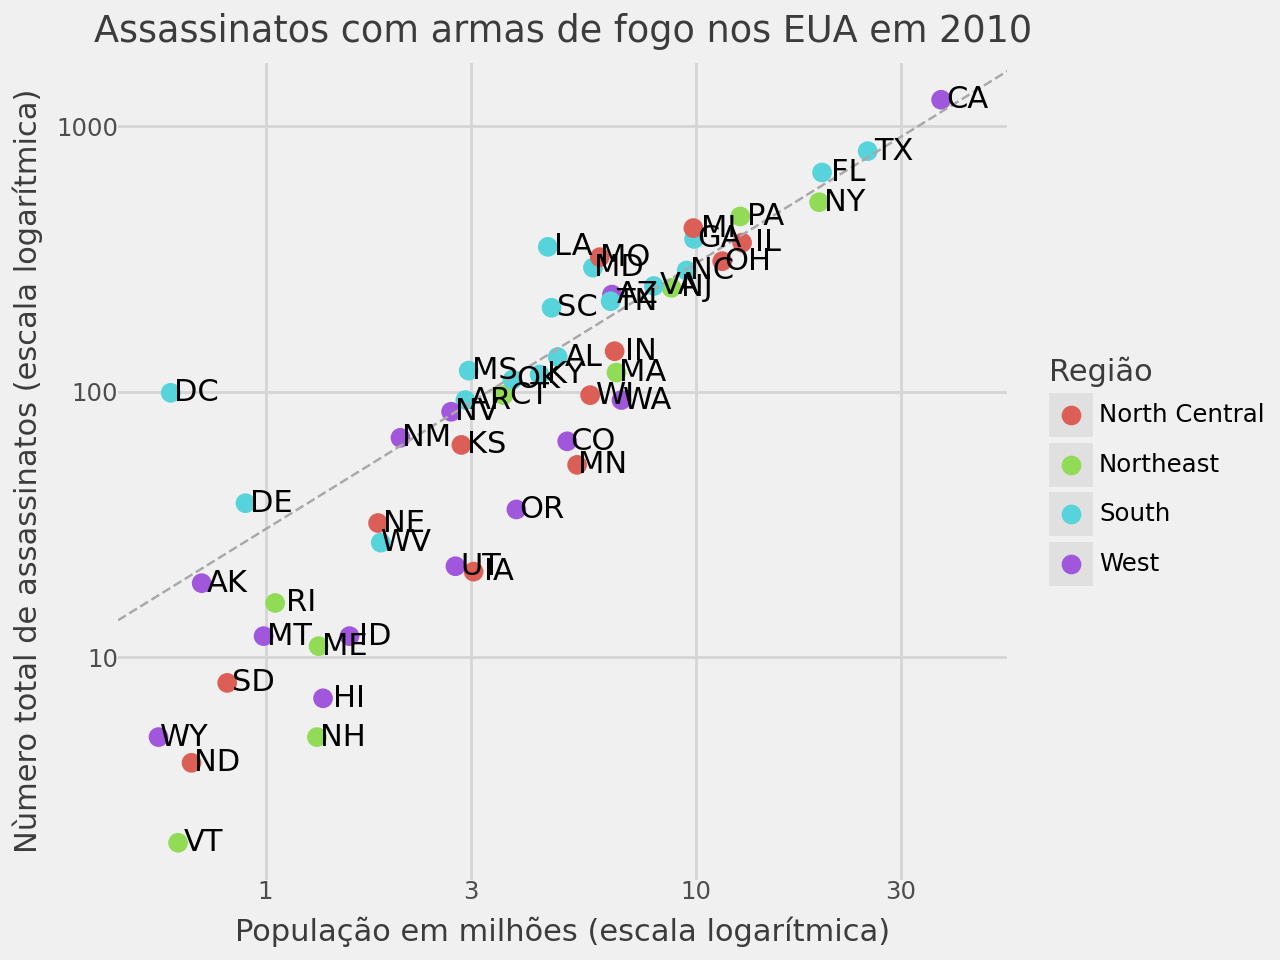

In [10]:
(
    graph1 + 
    geom_point(aes(color='region'), size=3) +
    scale_color_discrete(name = "Região") +
    geom_abline(intercept = np.log10(murders['rate']), linetype="dashed", color="darkgrey") +
    geom_text(nudge_x=0.06) + 
    scale_x_log10() + scale_y_log10() + 
    xlab("População em milhões (escala logarítmica)") + 
    ylab("Nùmero total de assassinatos (escala logarítmica)") + 
    ggtitle("Assassinatos com armas de fogo nos EUA em 2010") + 
    theme_538()
)

**Observações finais:**<br>
- Segui o passo a passo dos itens em alguns momentos consultando a solução compartilhada pelo colega **Joao Victor Rocha**
- Utilizei o tema "theme_538" (https://plotnine.org/reference/#themes) que mais se assemelha ao resultado final do passo a passo da referência bibliográfica

---

#### Item 2: exemplo explorado na Seção 3.5.3

Importação das bibliotecas necessárias e conjunto de dados para resolução do Item 2

In [11]:
from plotnine import *
from plotnine.data import diamonds
import pandas as pd

Pré-visualização do DataFrame

In [12]:
diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

Preparando dados para a consulta por valor

In [13]:
ideal = diamonds[ diamonds['cut'] == "Ideal" ]
ideal

carat    cut color clarity  depth  table  price     x     y     z
0       0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
11      0.23  Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
13      0.31  Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
16      0.30  Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
39      0.33  Ideal     I     SI2   61.8   55.0    403  4.49  4.51  2.78
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
53925   0.79  Ideal     I     SI1   61.6   56.0   2756  5.95  5.97  3.67
53926   0.71  Ideal     E     SI1   61.9   56.0   2756  5.71  5.73  3.54
53929   0.71  Ideal     G     VS1   61.4   56.0   2756  5.76  5.73  3.53
53935   0.72  Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53939   0.75  Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[21551 rows x 10 columns]

In [14]:
premium  = diamonds[ diamonds['cut'] == "Premium" ]
premium

carat      cut color clarity  depth  table  price     x     y     z
1       0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
12      0.22  Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
14      0.20  Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
15      0.32  Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
...      ...      ...   ...     ...    ...    ...    ...   ...   ...   ...
53928   0.79  Premium     E     SI2   61.4   58.0   2756  6.03  5.96  3.68
53930   0.71  Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49
53931   0.71  Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43
53934   0.72  Premium     D     SI1   62.7   59.0   2757  5.69  5.73  3.58
53938   0.86  Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74

[13791 rows x 10 columns]

In [15]:
algebra = diamonds[['carat', 'cut', 'price' ]]
algebra

carat        cut  price
0       0.23      Ideal    326
1       0.21    Premium    326
2       0.23       Good    327
3       0.29    Premium    334
4       0.31       Good    335
...      ...        ...    ...
53935   0.72      Ideal   2757
53936   0.72       Good   2757
53937   0.70  Very Good   2757
53938   0.86    Premium   2757
53939   0.75      Ideal   2757

[53940 rows x 3 columns]

Criação do objeto do gráfico:

In [16]:
graph2 = ggplot(data=algebra)

Apresentação do mapeamento das variáveis PRICE, CARAT e CUT nas coordenadas X e Y e cor:

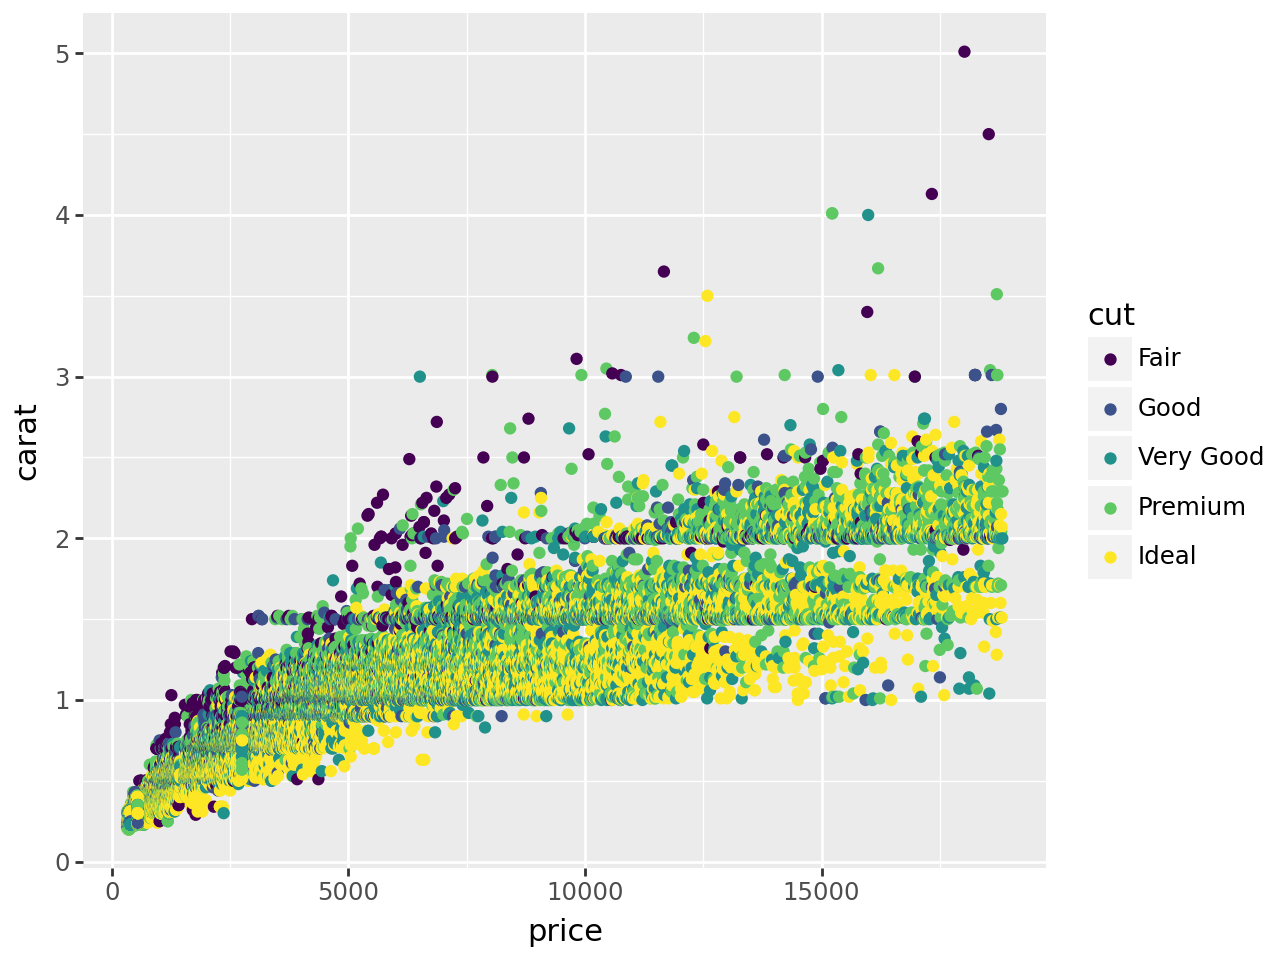

In [17]:
(
    graph2 + 
    geom_point(mapping=aes(x="price", y="carat", color="cut"))
)

Na sequência será personalizado os intervalos entre as marcas do gráfico.

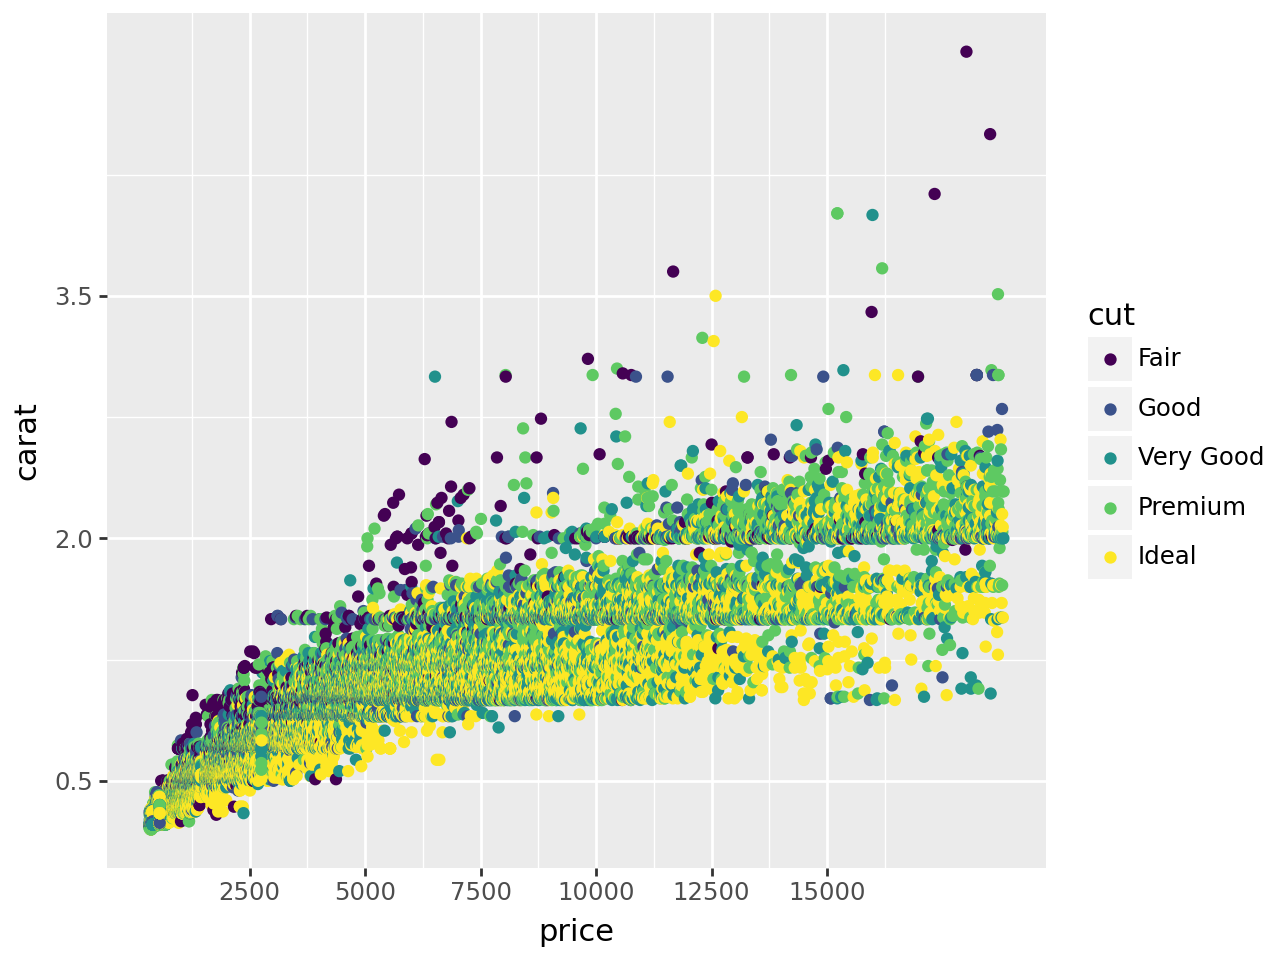

In [18]:
(
    graph2 + 
    geom_point(mapping=aes(x="price", y="carat", color="cut")) + 
    scale_x_continuous( breaks = range(2500, 17500, 2500)) +
    scale_y_continuous( breaks = [x / 10.0 for x in range(5, 50, 15)])
)

Seguindo para a etapa de Estatísticas, serão demonstrados alguns dados como média, desvio-padrão e mediana dos quilates e preços:

**Estatísticas sobre os quilates**

In [19]:
print("Média dos quilates: ", diamonds['carat'].mean())
print("Desvio-padrão dos quilates: ", diamonds['carat'].std())
print("Mediana dos quilates: ", diamonds['carat'].median())

Média dos quilates:  0.7979397478680014
Desvio-padrão dos quilates:  0.4740112444054184
Mediana dos quilates:  0.7


**Estatísticas sobre os preços**

In [20]:
print("Média dos preços: ", diamonds['price'].mean())
print("Desvio-padrão dos preços: ", diamonds['price'].std())
print("Mediana dos preços: ", diamonds['price'].median())

Média dos preços:  3932.799721913237
Desvio-padrão dos preços:  3989.439738146379
Mediana dos preços:  2401.0


Etapa Geometria: geometria de histograma

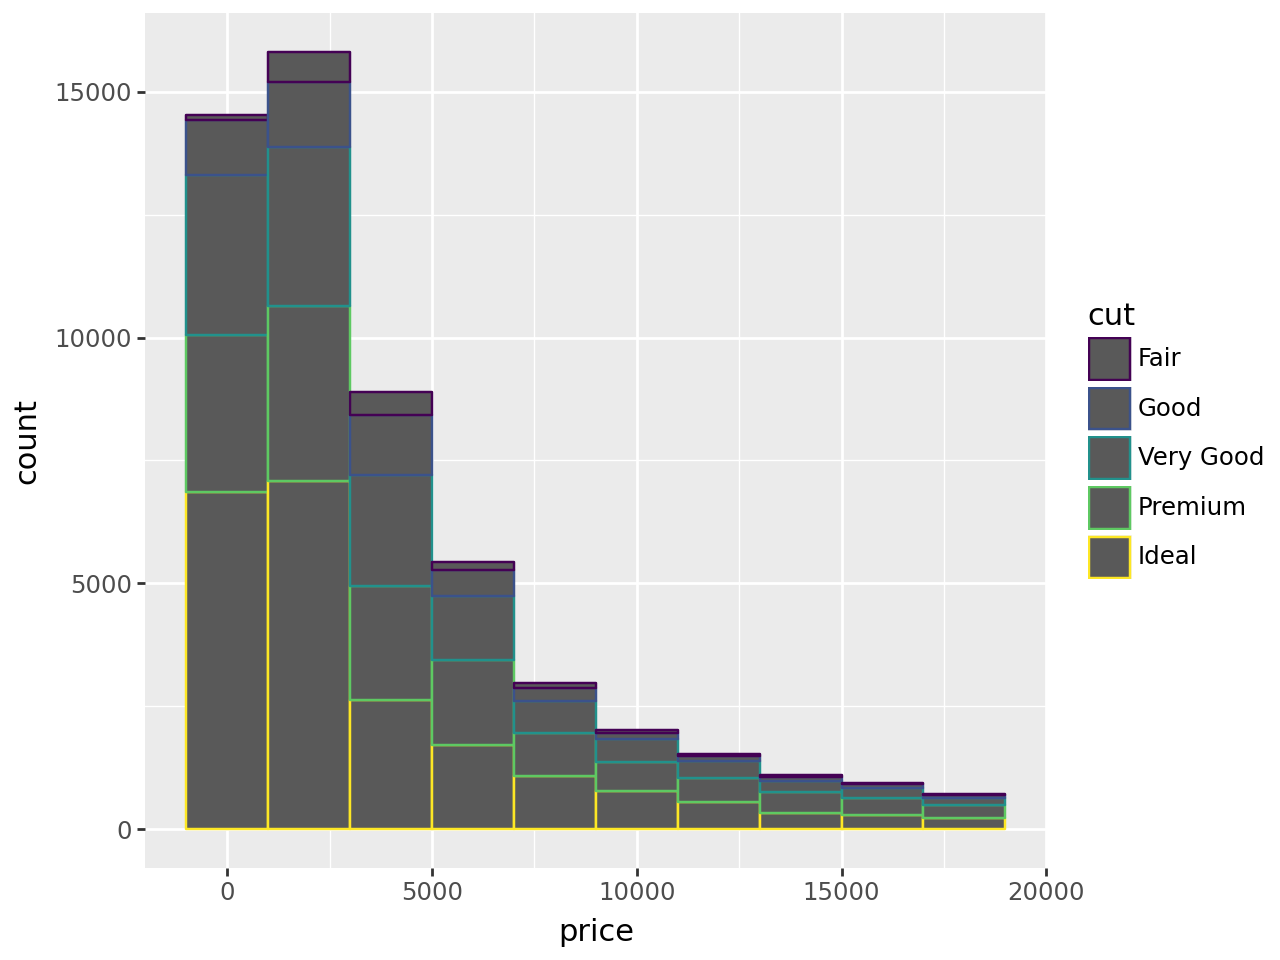

In [21]:
(
    ggplot(data=algebra) + 
    geom_histogram( mapping=aes(x="price", color="cut"), binwidth=2000)
)

Etapa Geometria: geometria de gráfico de frequências

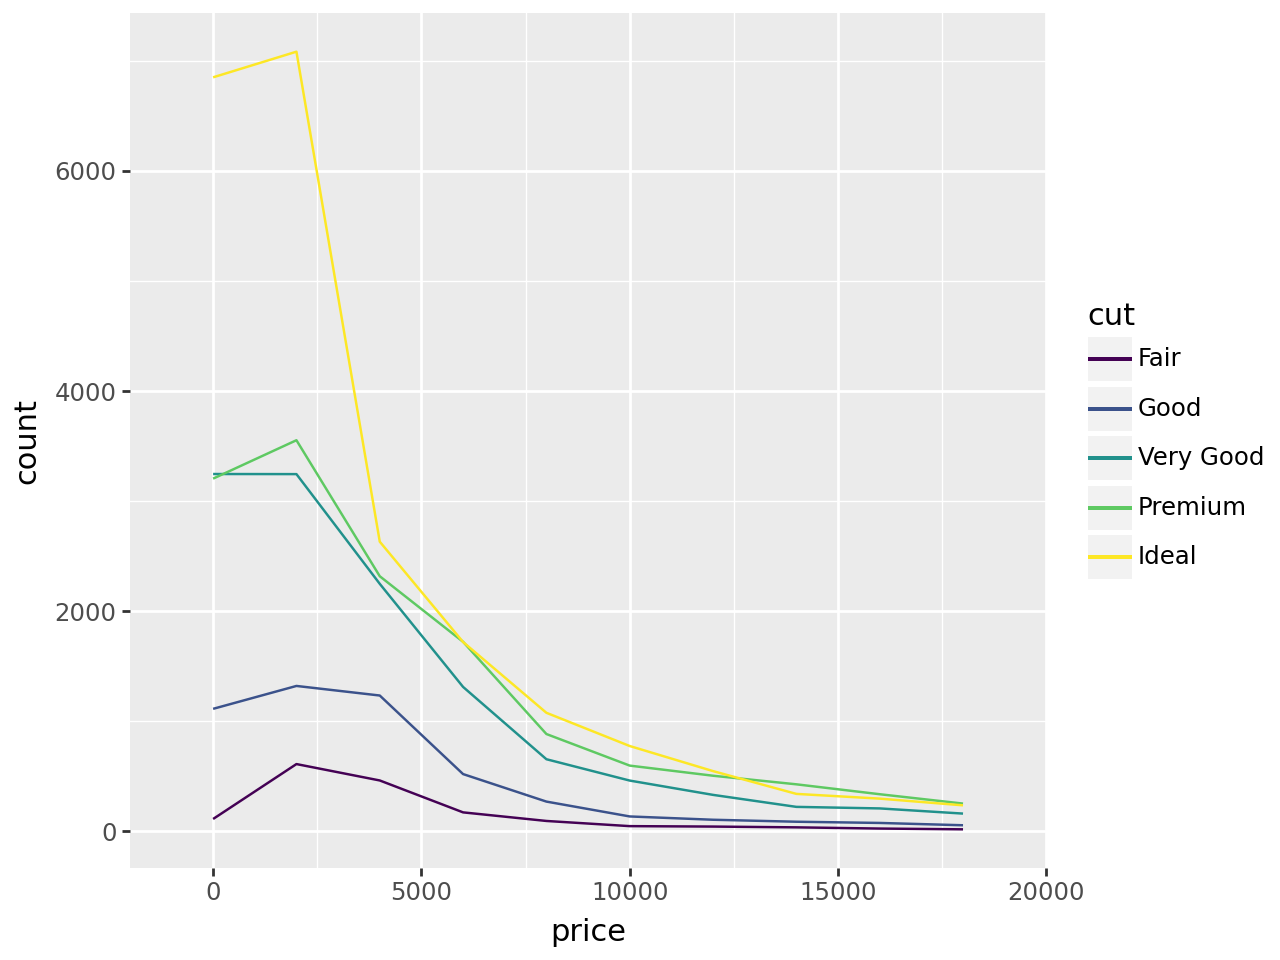

In [22]:
(
    ggplot(data=algebra) + 
    geom_freqpoly( mapping=aes(x="price", color="cut"), binwidth=2000)
)

Diferentes coordenadas para o conjunto de variáveis anterior

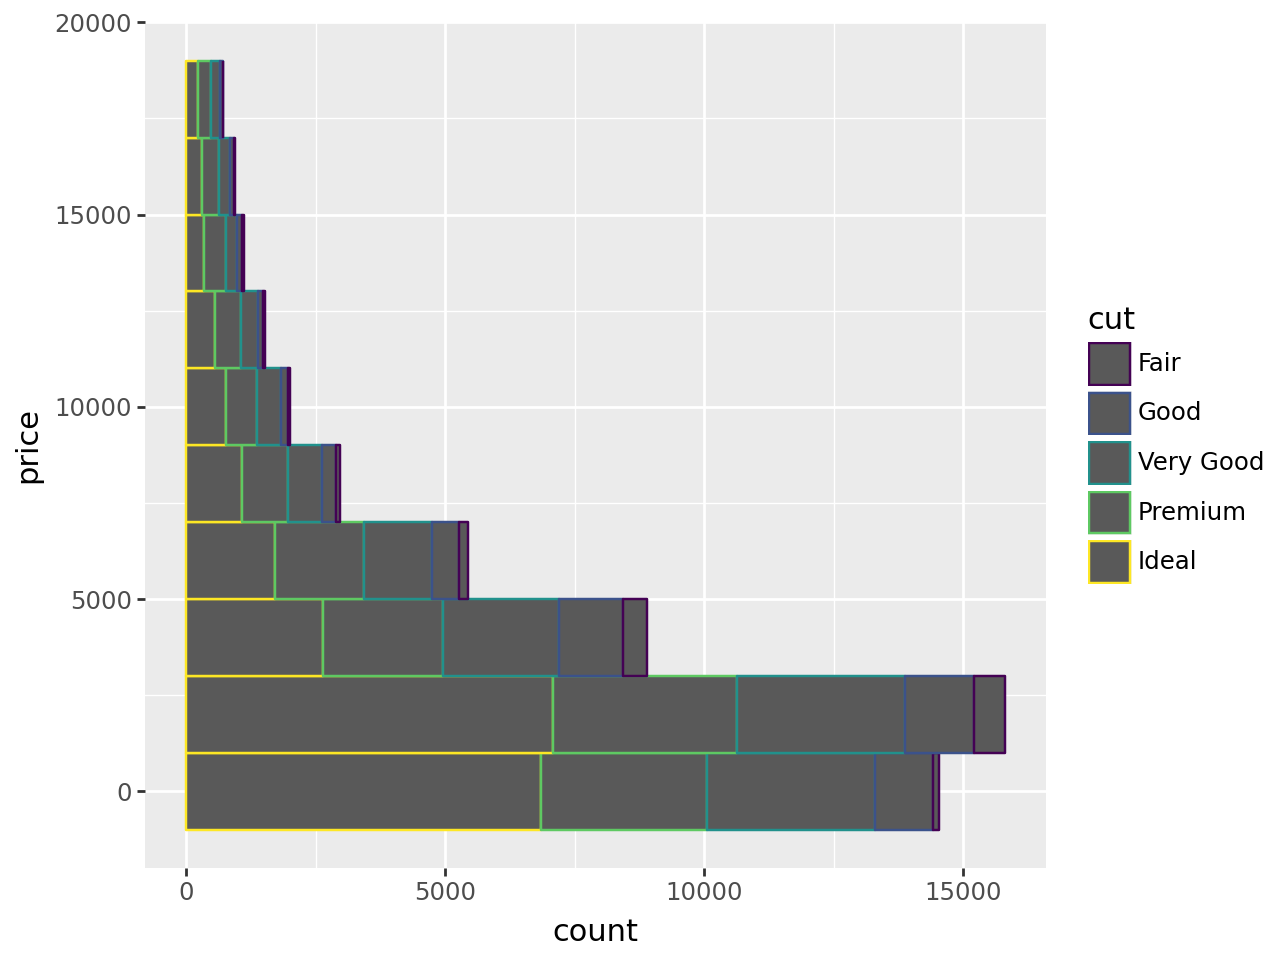

In [23]:
(
    ggplot(data=algebra) + 
    geom_histogram(mapping=aes(x="price", color="cut"), binwidth=2000) +
    coord_flip()
)

Para reproduzir o exemplo das coordenadas polares não consegui encontrar uma equivalência de função que possibilitasse a plotagem deste exemplo. Referência de documentação consultada: https://plotnine.org/reference/

Gráfico contendo duas camadas: gráfico de dispersão e uma camada de correlação entre preço e o quilate dos diamantes

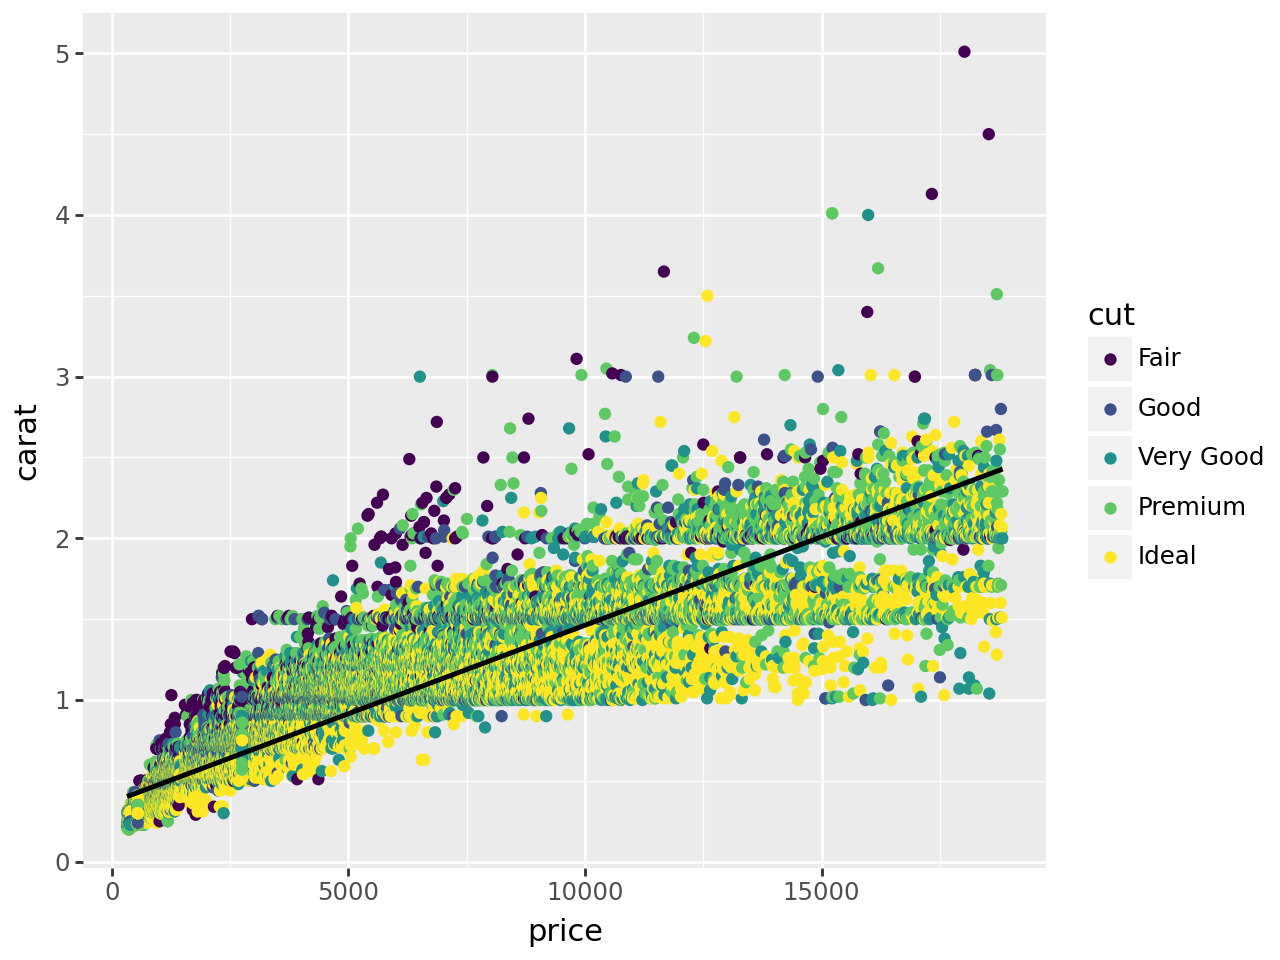

In [24]:
(
    ggplot(data=algebra, mapping=aes(x="price", y="carat")) + 
    geom_point(mapping=aes(color="cut")) + 
    geom_smooth(method="lm", se=False)
)

Visualização multifacetada

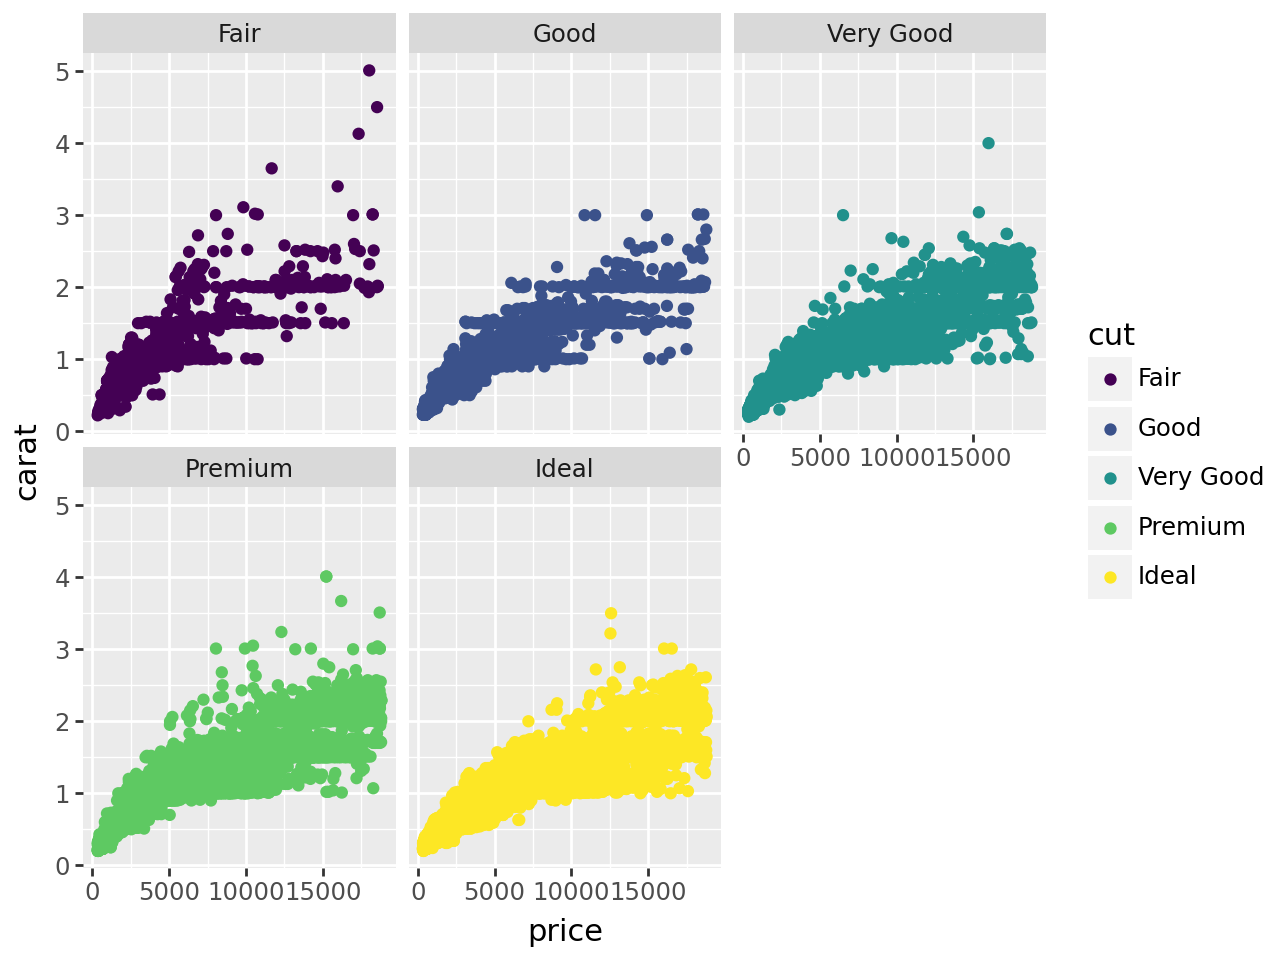

In [25]:
(
    ggplot(data=algebra, mapping=aes(x="price", y="carat", color="cut")) +
    geom_point() + 
    facet_wrap("~cut", nrow=2)
)

**Observações finais:**<br>
- Segui o passo a passo dos itens em alguns momentos consultando a solução compartilhada pelo colega **Taylon**

---

#### Item 3: caso 1 da Seção 10.1 na referência [34]

O trecho de código abaixo foi utilizado com base na solução do colega **Rehder**, que conectou o Python à leitura de dados da linguagem R.

In [26]:
import pyreadr

pyreadr.download_file('https://github.com/rafalab/dslabs/raw/master/data/gapminder.rda', "gapminder.rda")
result = pyreadr.read_r('gapminder.rda')

print(result.keys())
gapminder = result["gapminder"]
gapminder

odict_keys(['gapminder', 'oecd', 'opec'])


country  year  infant_mortality  life_expectancy  \
0                  Albania  1960            115.40            62.87   
1                  Algeria  1960            148.20            47.50   
2                   Angola  1960            208.00            35.98   
3      Antigua and Barbuda  1960               NaN            62.97   
4                Argentina  1960             59.87            65.39   
...                    ...   ...               ...              ...   
10540   West Bank and Gaza  2016               NaN            74.70   
10541              Vietnam  2016               NaN            75.60   
10542                Yemen  2016               NaN            64.92   
10543               Zambia  2016               NaN            57.10   
10544             Zimbabwe  2016               NaN            61.69   

       fertility  population           gdp continent              region  
0           6.19   1636054.0           NaN    Europe     Southern Europe  
1           7.65  11124892.0  1.382815e+10    Africa     Northern Africa  
2           7.32   5270844.0           NaN    Africa       Middle Africa  
3           4.43     54681.0           NaN  Americas           Caribbean  
4           3.11  20619075.0  1.083223e+11  Americas       South America  
...          ...         ...           ...       ...                 ...  
10540        NaN         NaN           NaN      Asia        Western Asia  
10541        NaN         NaN           NaN      Asia  South-Eastern Asia  
10542        NaN         NaN           NaN      Asia        Western Asia  
10543        NaN         NaN           NaN    Africa      Eastern Africa  
10544        NaN         NaN           NaN    Africa      Eastern Africa  

[10545 rows x 9 columns]

---

#### Item 4: caso 2 descrito na Seção 10.5 na referência [34]

Filtro dos pares de países, analisando suas taxas de mortalidade infantil em 2015:

In [27]:
results_filtered = { 'Country 1' : [], 'Infant Mortality 1' : [], 'Country 2' : [], 'Infant Mortality 2' : [] }
result_temp = gapminder[ (gapminder['country'].isin(["Sri Lanka", "Turkey", "Poland", "South Korea", "Malaysia", "Russia", "Pakistan", "Vietnam", "Thailand", "South Africa" ])) & (gapminder['year'] == 2015) ]

results_filtered['Country 1'] = [result_temp.iloc[6,0], result_temp.iloc[3,0], result_temp.iloc[1,0], result_temp.iloc[2,0], result_temp.iloc[7,0]]
results_filtered['Country 2'] = [result_temp.iloc[8,0], result_temp.iloc[0,0], result_temp.iloc[4,0], result_temp.iloc[9,0], result_temp.iloc[5,0]]
results_filtered['Infant Mortality 1'] = [result_temp.iloc[6,2], result_temp.iloc[3,2], result_temp.iloc[1,2], result_temp.iloc[2,2], result_temp.iloc[7,2]]
results_filtered['Infant Mortality 2'] = [result_temp.iloc[8,2], result_temp.iloc[0,2], result_temp.iloc[4,2], result_temp.iloc[9,2], result_temp.iloc[5,2]]

gapminder_filtered = pd.DataFrame(results_filtered)
gapminder_filtered

Country 1  Infant Mortality 1     Country 2  Infant Mortality 2
0  Sri Lanka                 8.4        Turkey                11.6
1     Poland                 4.5   South Korea                 2.9
2   Malaysia                 6.0        Russia                 8.2
3   Pakistan                65.8       Vietnam                17.3
4   Thailand                10.5  South Africa                33.6

Gráficos de dispersão

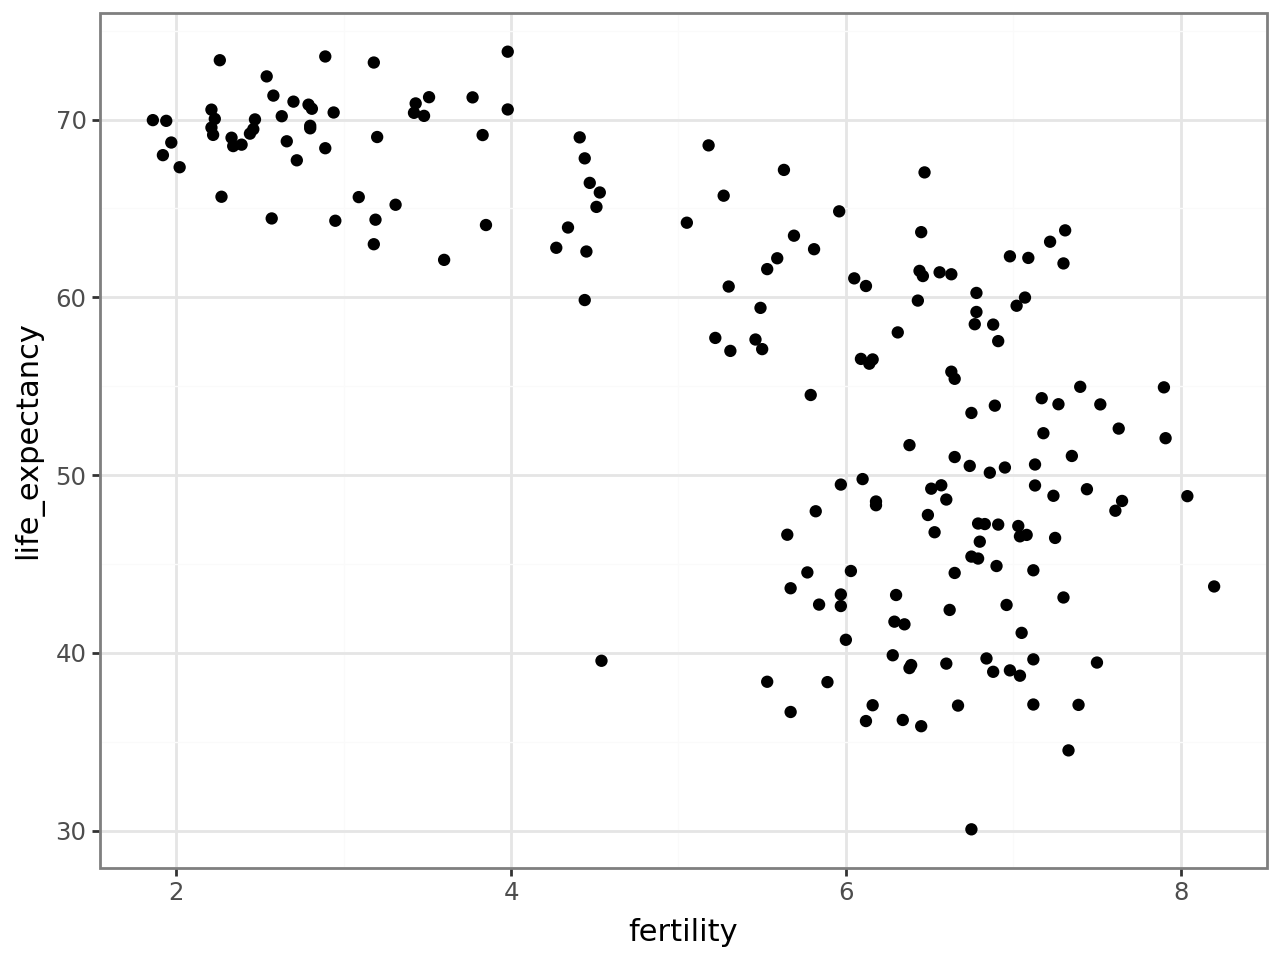

In [28]:
(
    ggplot(data=gapminder[gapminder['year'] == 1962], mapping=aes(x="fertility", y="life_expectancy")) +
    geom_point() + 
    theme_bw()
)

Utilizando a cor para representar o continente

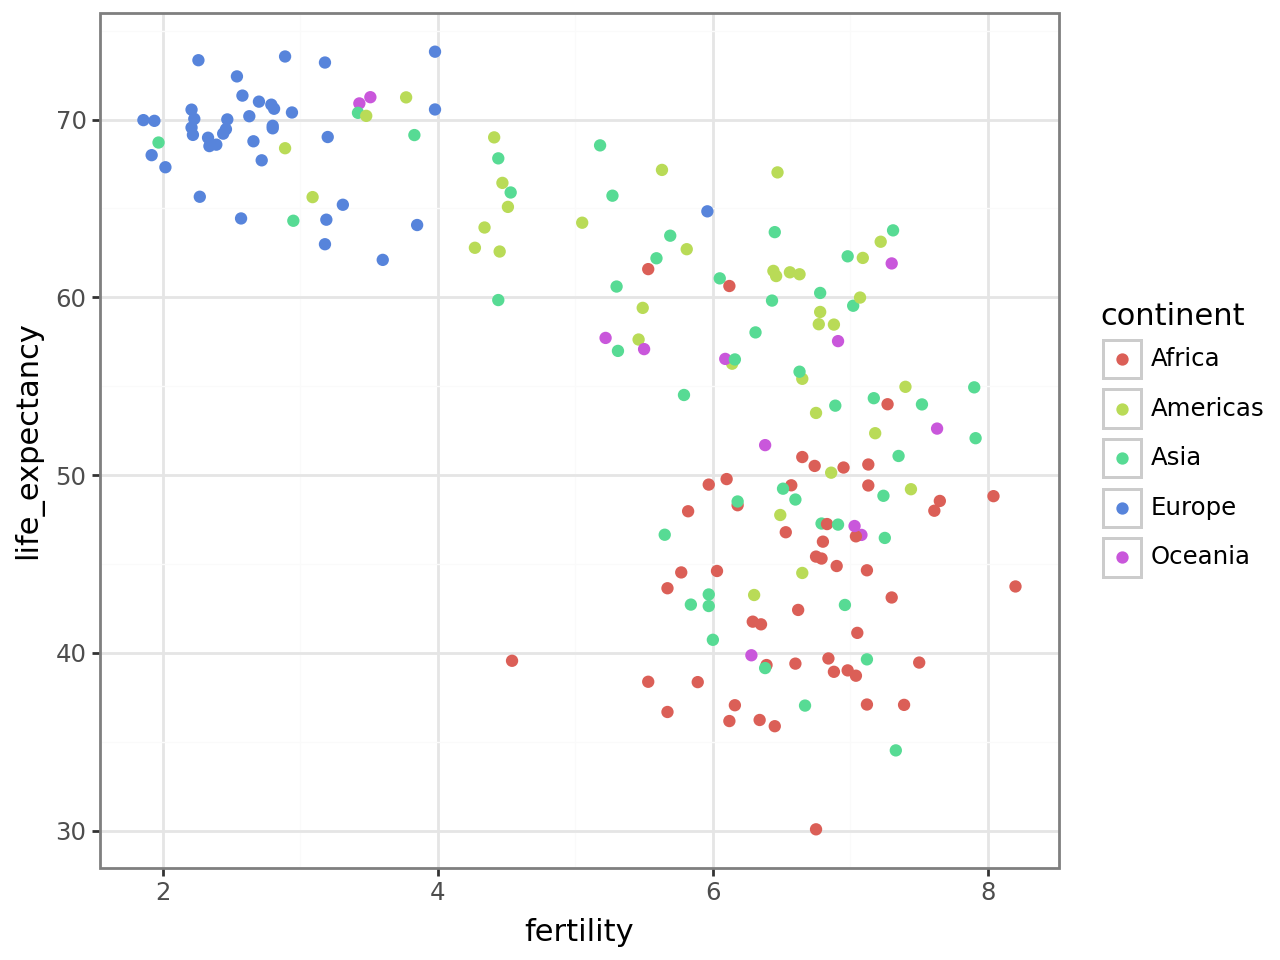

In [29]:
(
    ggplot(data=gapminder[gapminder['year'] == 1962], mapping=aes(x="fertility", y="life_expectancy", color="continent")) +
    geom_point() + 
    theme_bw()
)

Facetação

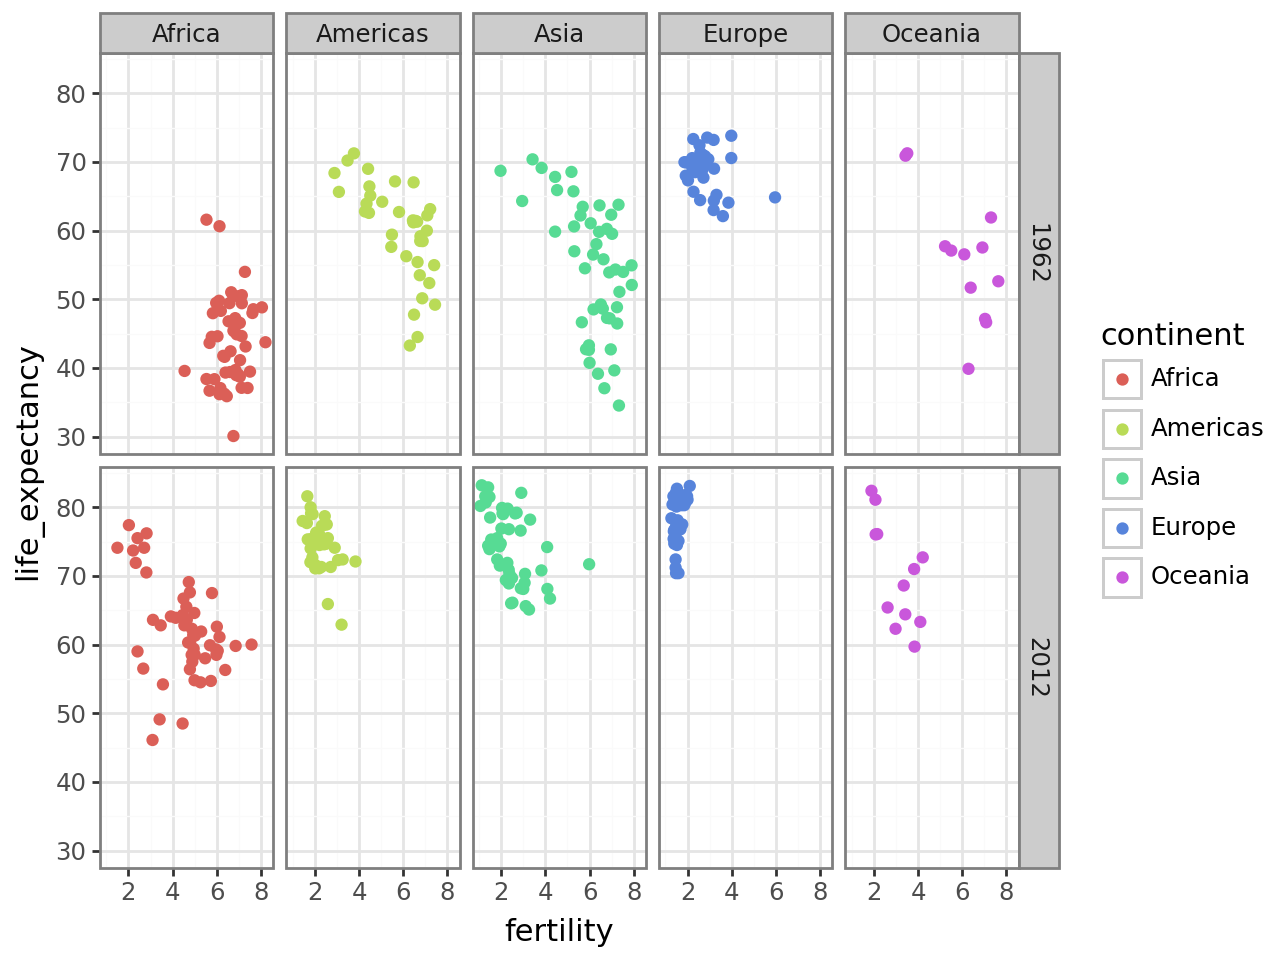

In [30]:
(
    ggplot(data=gapminder[ gapminder['year'].isin([1962, 2012]) ], mapping=aes(x="fertility", y="life_expectancy", color="continent")) +
    geom_point() + 
    facet_grid("year~continent") +
    theme_bw()
)

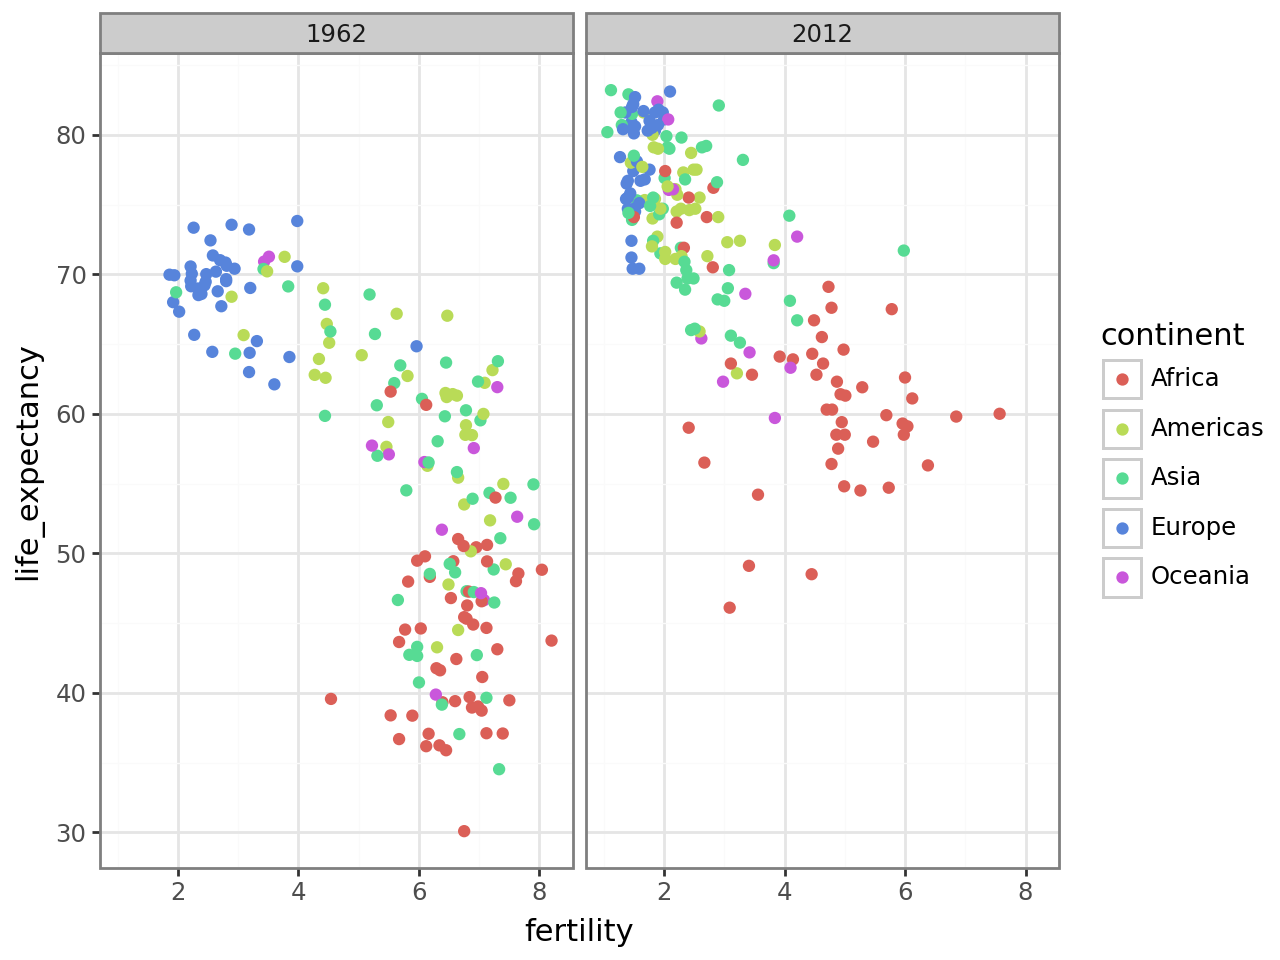

In [31]:
(
    ggplot(data=gapminder[ gapminder['year'].isin([1962, 2012]) ], mapping=aes(x="fertility", y="life_expectancy", color="continent")) +
    geom_point() + 
    facet_grid(".~year") +
    theme_bw()
)

Explorando como a transformação aconteceu ao longo dos anos nos continentes europeu e asiático

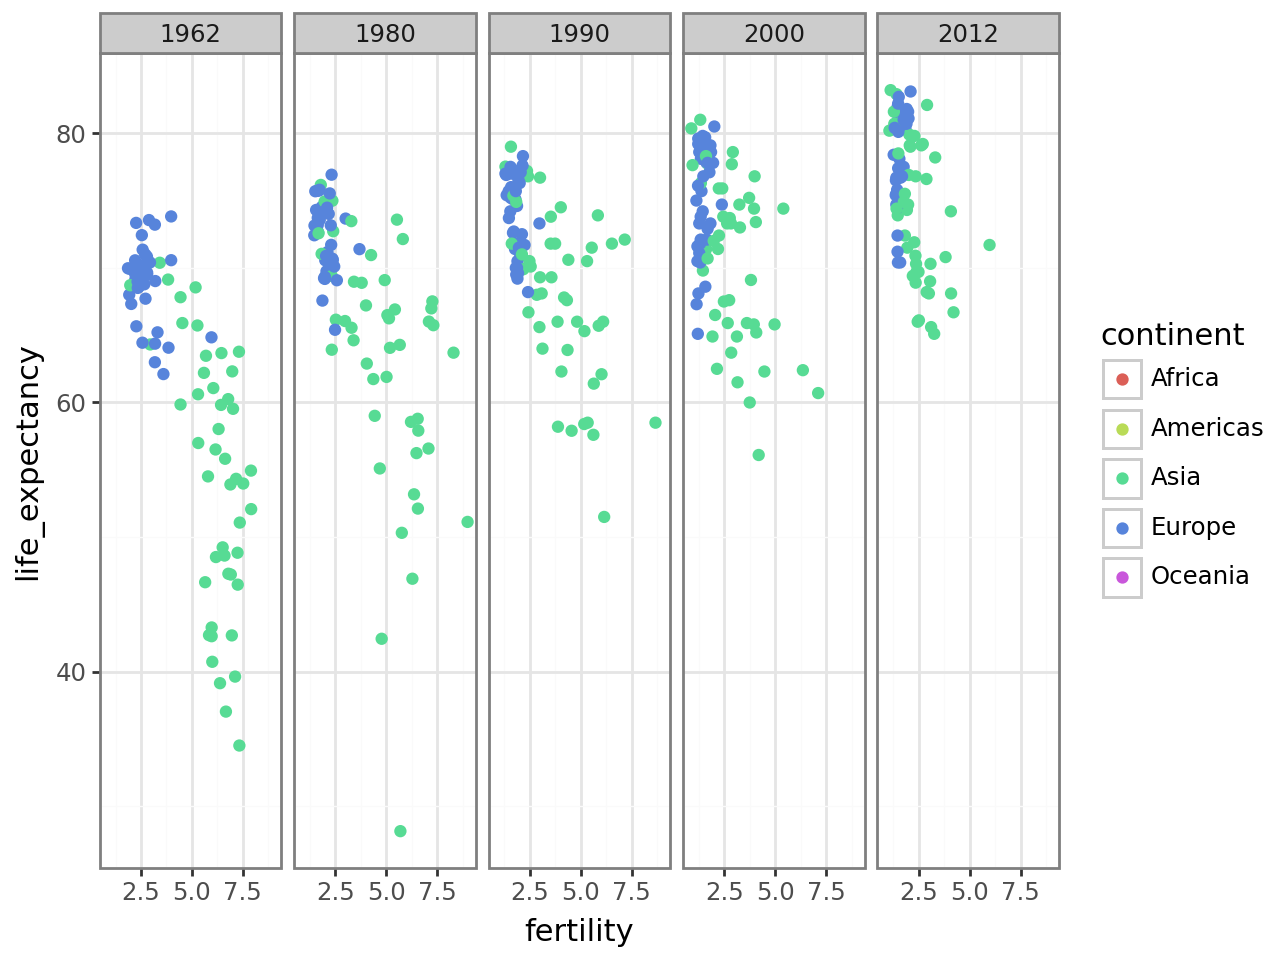

In [32]:
years = [1962, 1980, 1990, 2000, 2012]
continents = ["Europe", "Asia"]
(
    ggplot(data=gapminder[ (gapminder['year'].isin(years)) & (gapminder['continent'].isin(continents)) ], 
           mapping=aes(x="fertility", y="life_expectancy", color="continent")) +
    geom_point() + 
    facet_grid("~year") +
    theme_bw()
)

Escalas fixas

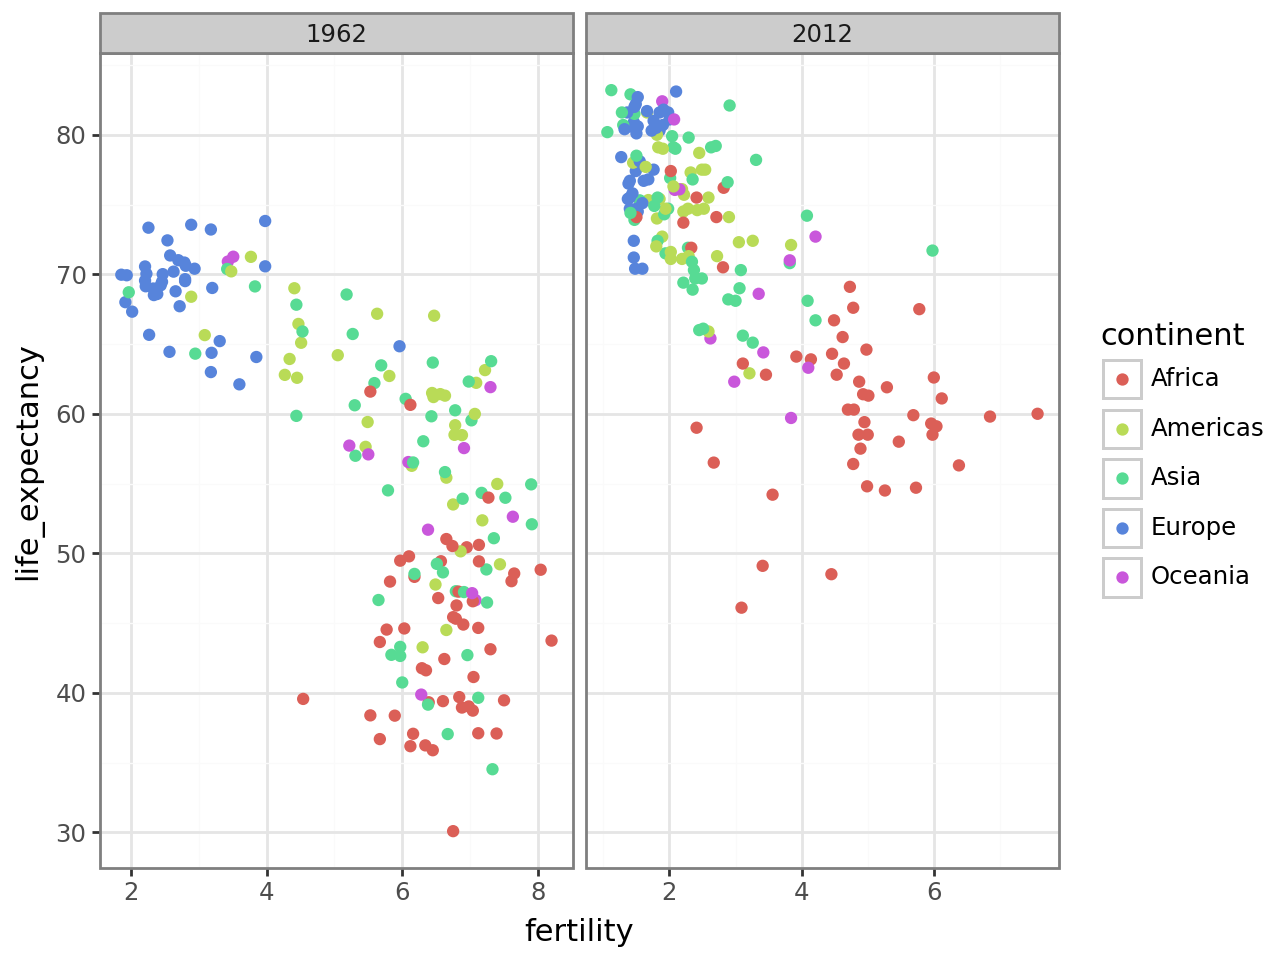

In [33]:
years = [1962, 2012]
(
    ggplot(data=gapminder[ gapminder['year'].isin(years) ], 
           mapping=aes(x="fertility", y="life_expectancy", color="continent")) +
    geom_point() + 
    facet_grid(rows="~year", scales="free") +
    theme_bw()
)

##### Gráficos de séries temporais

c:\Dev\Python\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


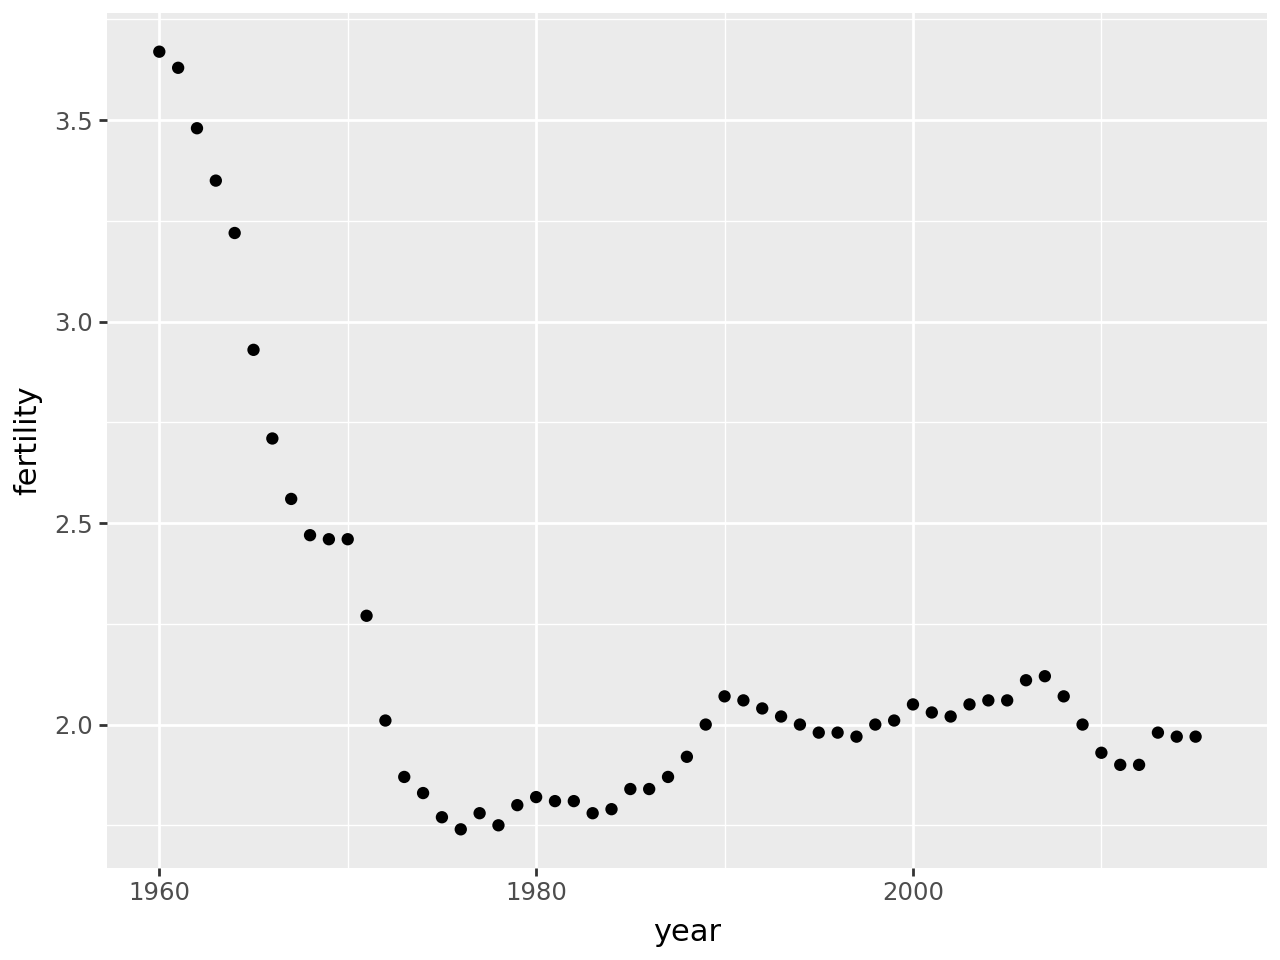

In [34]:
(
    ggplot(data=gapminder[ gapminder['country'] == "United States" ],
           mapping=aes(x="year", y="fertility")) +
    geom_point()
)

Seguindo o exemplo, agora plotando um gráfico de linha

c:\Dev\Python\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


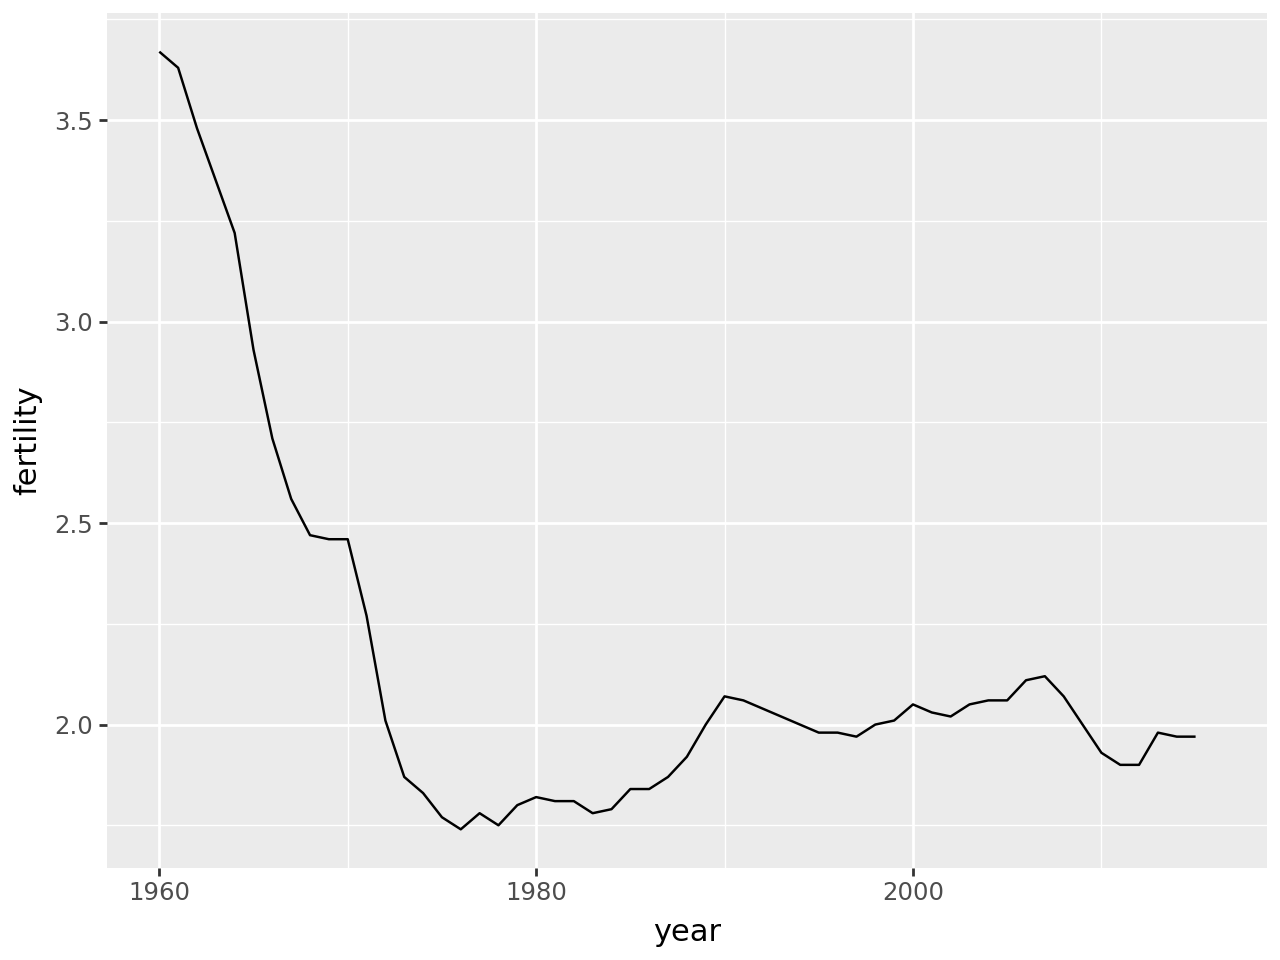

In [35]:
(
    ggplot(data=gapminder[ gapminder['country'] == "United States" ],
           mapping=aes(x="year", y="fertility")) +
    geom_line()
)

c:\Dev\Python\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


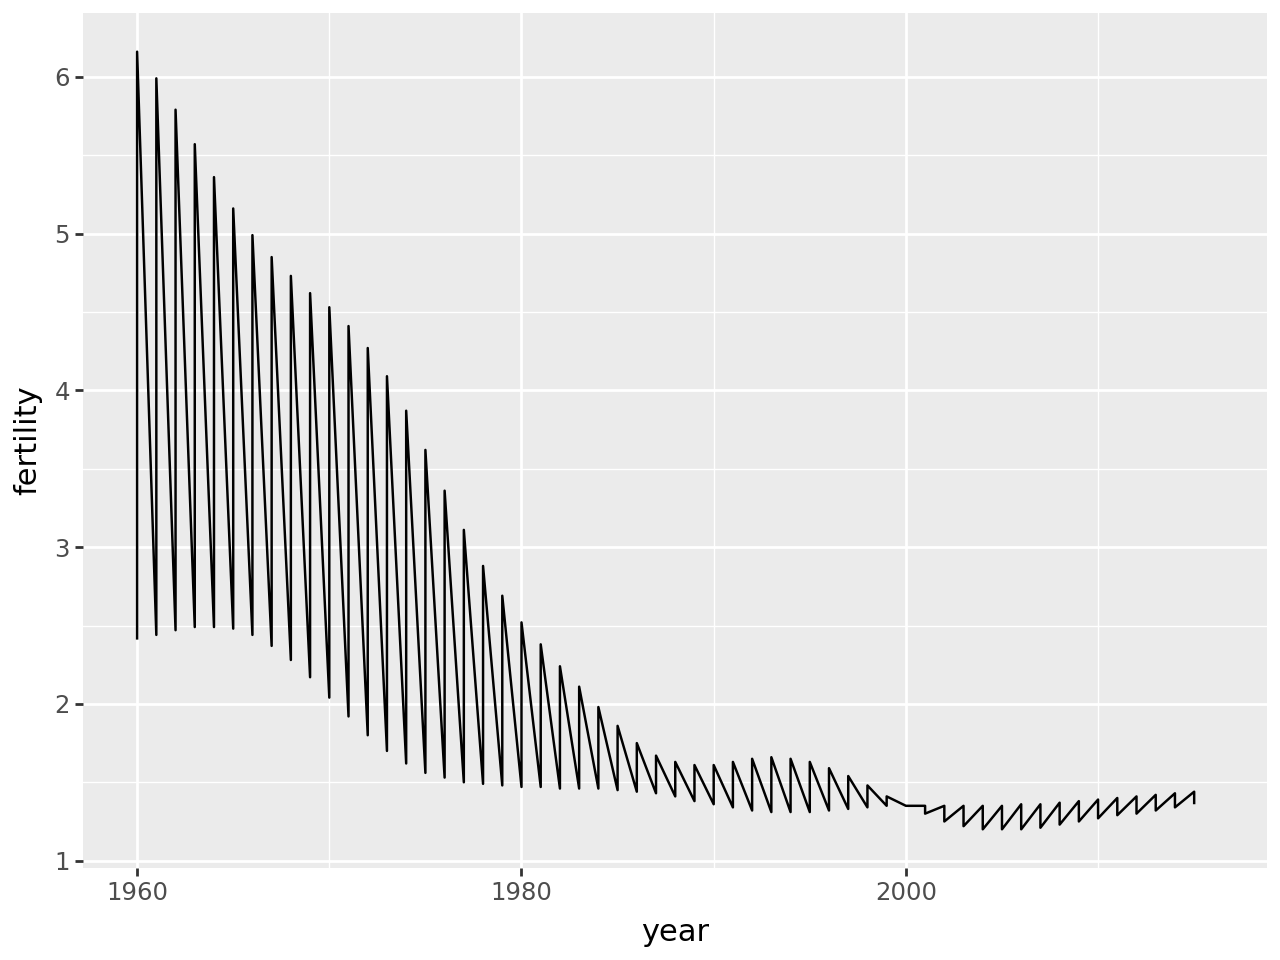

In [36]:
countries = ["South Korea", "Germany"]
(
    ggplot(data=gapminder[ gapminder['country'].isin(countries) ],
           mapping=aes(x="year", y="fertility")) +
    geom_line()
)

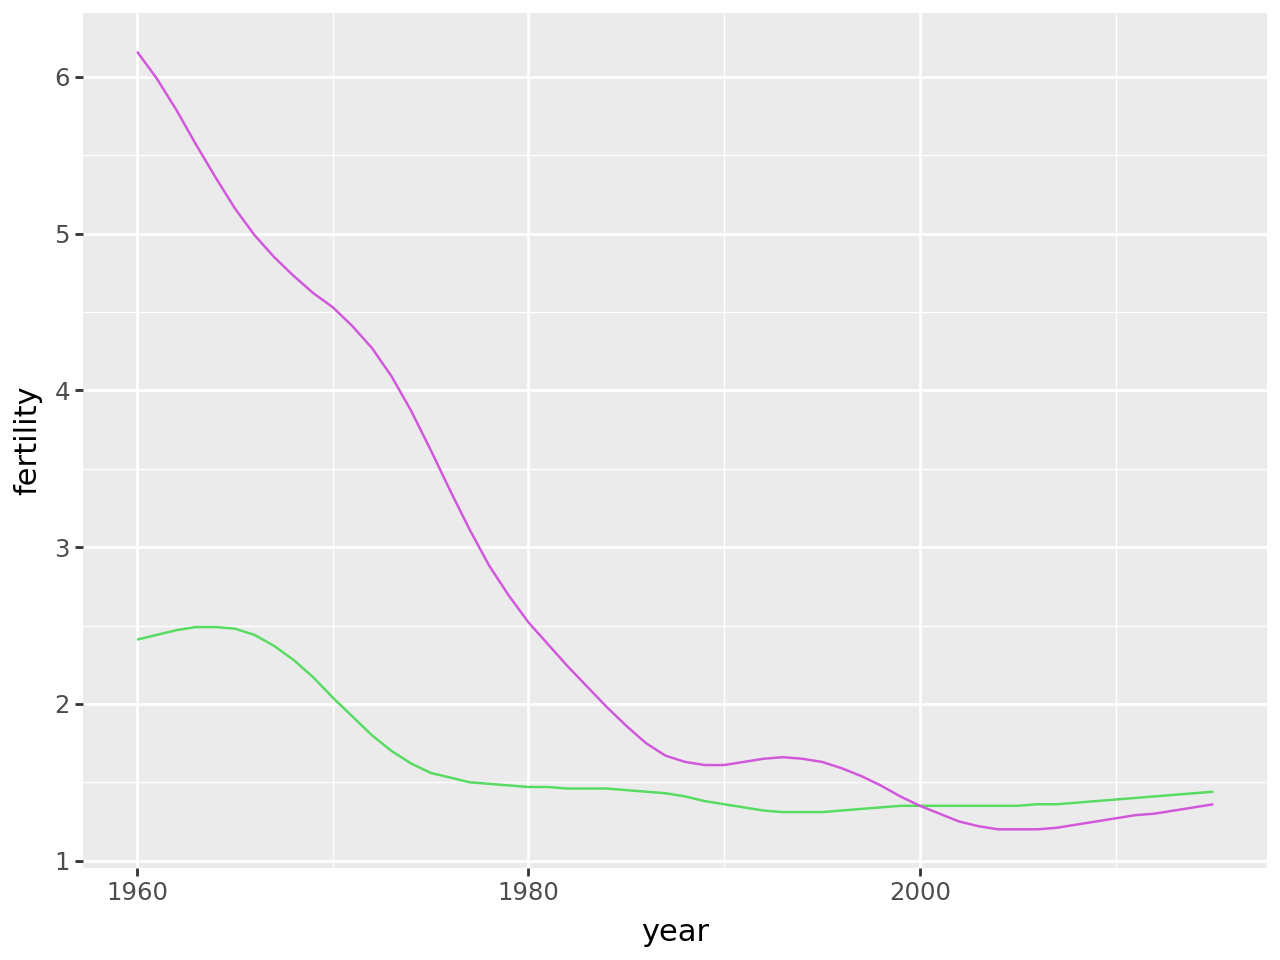

In [37]:
countries = ["South Korea", "Germany"]
(
    ggplot(data=gapminder[ (gapminder['country'].isin(countries)) & (gapminder['fertility'].notnull()) ],
           mapping=aes(x="year", y="fertility", group="country", color="country")) +
    geom_line() + 
    theme(legend_position="none")
)

**Observações:** neste exemplo ao imprimir as legendas está sendo exibido cores e valores para todos os países.

##### Transformações de Dados

In [38]:
gapminder['dollars_per_day'] = gapminder['gdp'] / gapminder['population'] / 365
gapminder

country  year  infant_mortality  life_expectancy  \
0                  Albania  1960            115.40            62.87   
1                  Algeria  1960            148.20            47.50   
2                   Angola  1960            208.00            35.98   
3      Antigua and Barbuda  1960               NaN            62.97   
4                Argentina  1960             59.87            65.39   
...                    ...   ...               ...              ...   
10540   West Bank and Gaza  2016               NaN            74.70   
10541              Vietnam  2016               NaN            75.60   
10542                Yemen  2016               NaN            64.92   
10543               Zambia  2016               NaN            57.10   
10544             Zimbabwe  2016               NaN            61.69   

       fertility  population           gdp continent              region  \
0           6.19   1636054.0           NaN    Europe     Southern Europe   
1           7.65  11124892.0  1.382815e+10    Africa     Northern Africa   
2           7.32   5270844.0           NaN    Africa       Middle Africa   
3           4.43     54681.0           NaN  Americas           Caribbean   
4           3.11  20619075.0  1.083223e+11  Americas       South America   
...          ...         ...           ...       ...                 ...   
10540        NaN         NaN           NaN      Asia        Western Asia   
10541        NaN         NaN           NaN      Asia  South-Eastern Asia   
10542        NaN         NaN           NaN      Asia        Western Asia   
10543        NaN         NaN           NaN    Africa      Eastern Africa   
10544        NaN         NaN           NaN    Africa      Eastern Africa   

       dollars_per_day  
0                  NaN  
1             3.405458  
2                  NaN  
3                  NaN  
4            14.393153  
...                ...  
10540              NaN  
10541              NaN  
10542              NaN  
10543              NaN  
10544              NaN  

[10545 rows x 10 columns]

Transformação de log

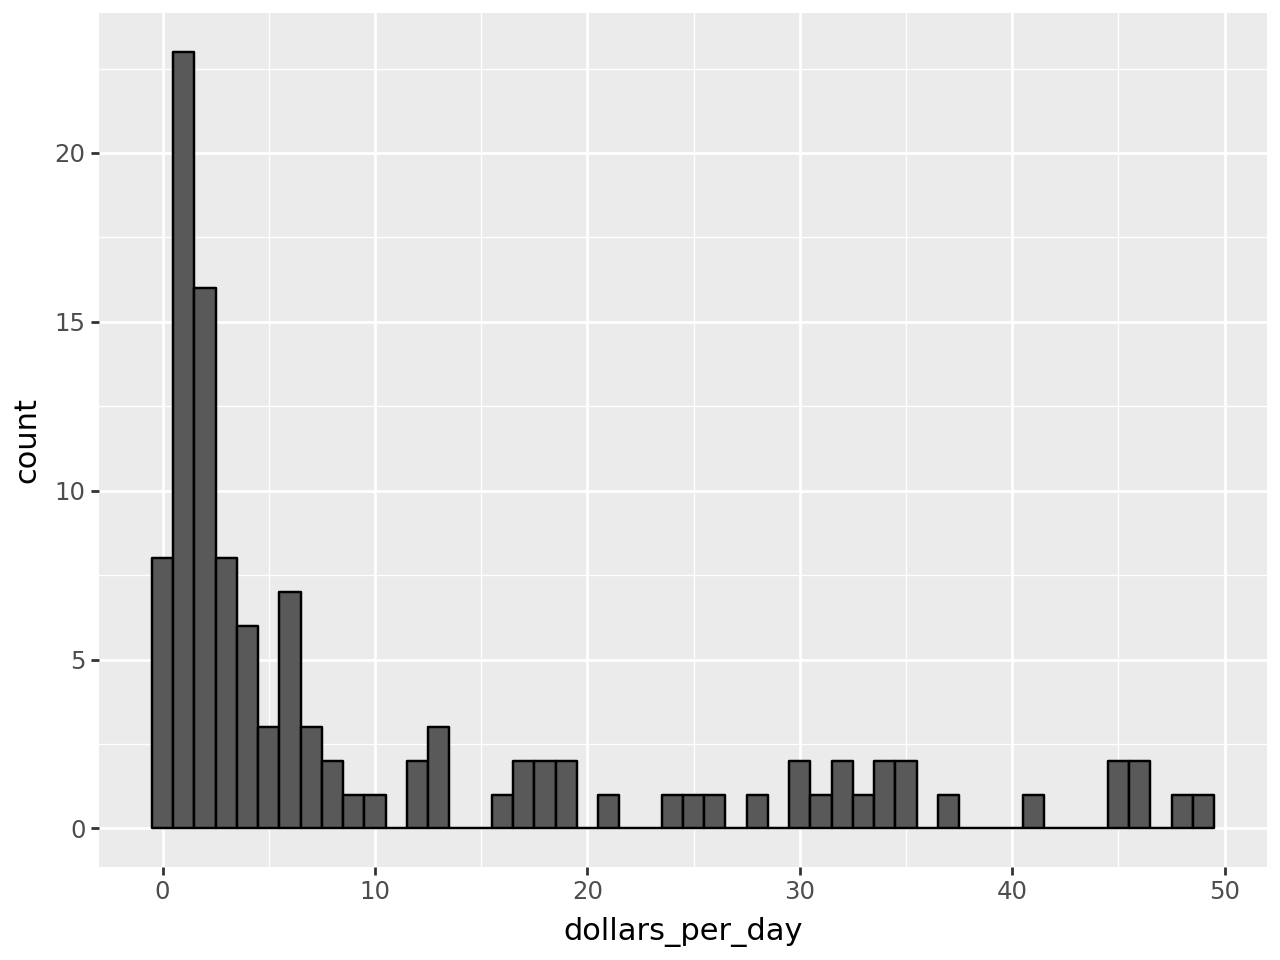

In [39]:
past_year = 1970
(
    ggplot(data=gapminder[ (gapminder['year'] == past_year) & (gapminder['gdp'].notnull()) ],
           mapping=aes(x="dollars_per_day")) + 
    geom_histogram(binwidth=1, color="black")
)

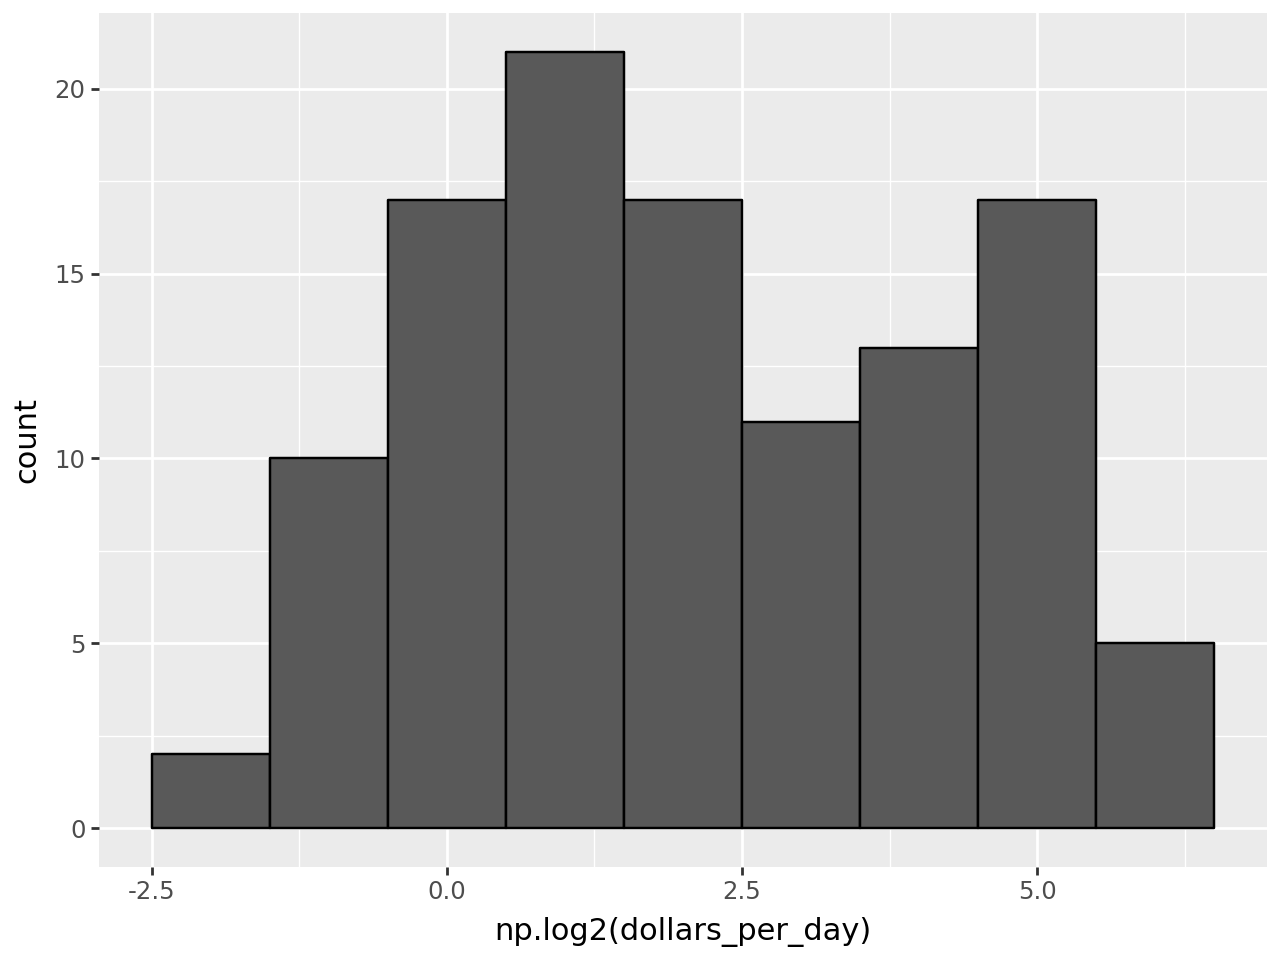

In [40]:
import numpy as np
past_year = 1970
(
    ggplot(data=gapminder[ (gapminder['year'] == past_year) & (gapminder['gdp'].notnull()) ],
           mapping=aes(x="np.log2(dollars_per_day)")) + 
    geom_histogram(binwidth=1, color="black")
)

##### Boxplots e Ridge plots

C:\Users\junio\AppData\Local\Temp\ipykernel_19728\497560480.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


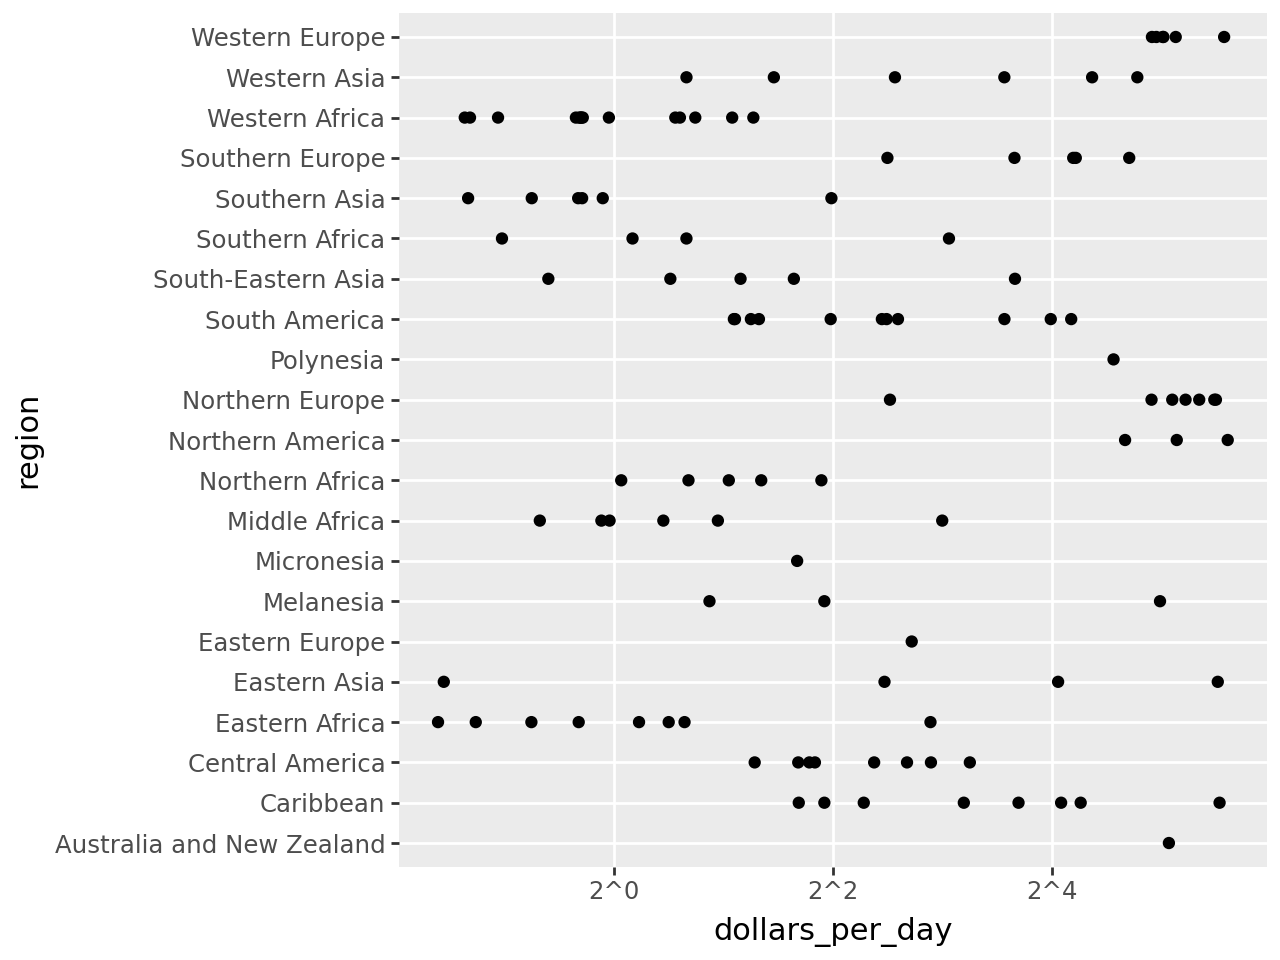

In [41]:
past_year = 1970

sorted_regions = gapminder.groupby('region')['dollars_per_day'].median().sort_values()

sorted_gapminder = gapminder.set_index('region')
sorted_gapminder = sorted_gapminder.loc[sorted_regions.index].reset_index()

filtered = sorted_gapminder[ (sorted_gapminder['year'] == past_year) & (sorted_gapminder['gdp'].notnull()) ]

(
    ggplot(data=filtered, mapping=aes(x="dollars_per_day", y="region") ) +
    geom_point() + 
    scale_x_continuous(trans="log2")
)

---

### Exercício 3: 
Utilize a função **ggtitle** para adicionar uma camada de título principal para os 4 gráficos construídos